In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.constants import c as speed_of_light
from scipy.integrate import simpson


In [35]:
def total_flux(wl, flux_nu):
    flux_lambda = (speed_of_light / wl ** 2) * flux_nu
    tot_flux = simpson(flux_lambda, wl)
    return tot_flux

In [27]:
with open('ModelData.pkl', 'rb') as f:
    df = pickle.load(f)

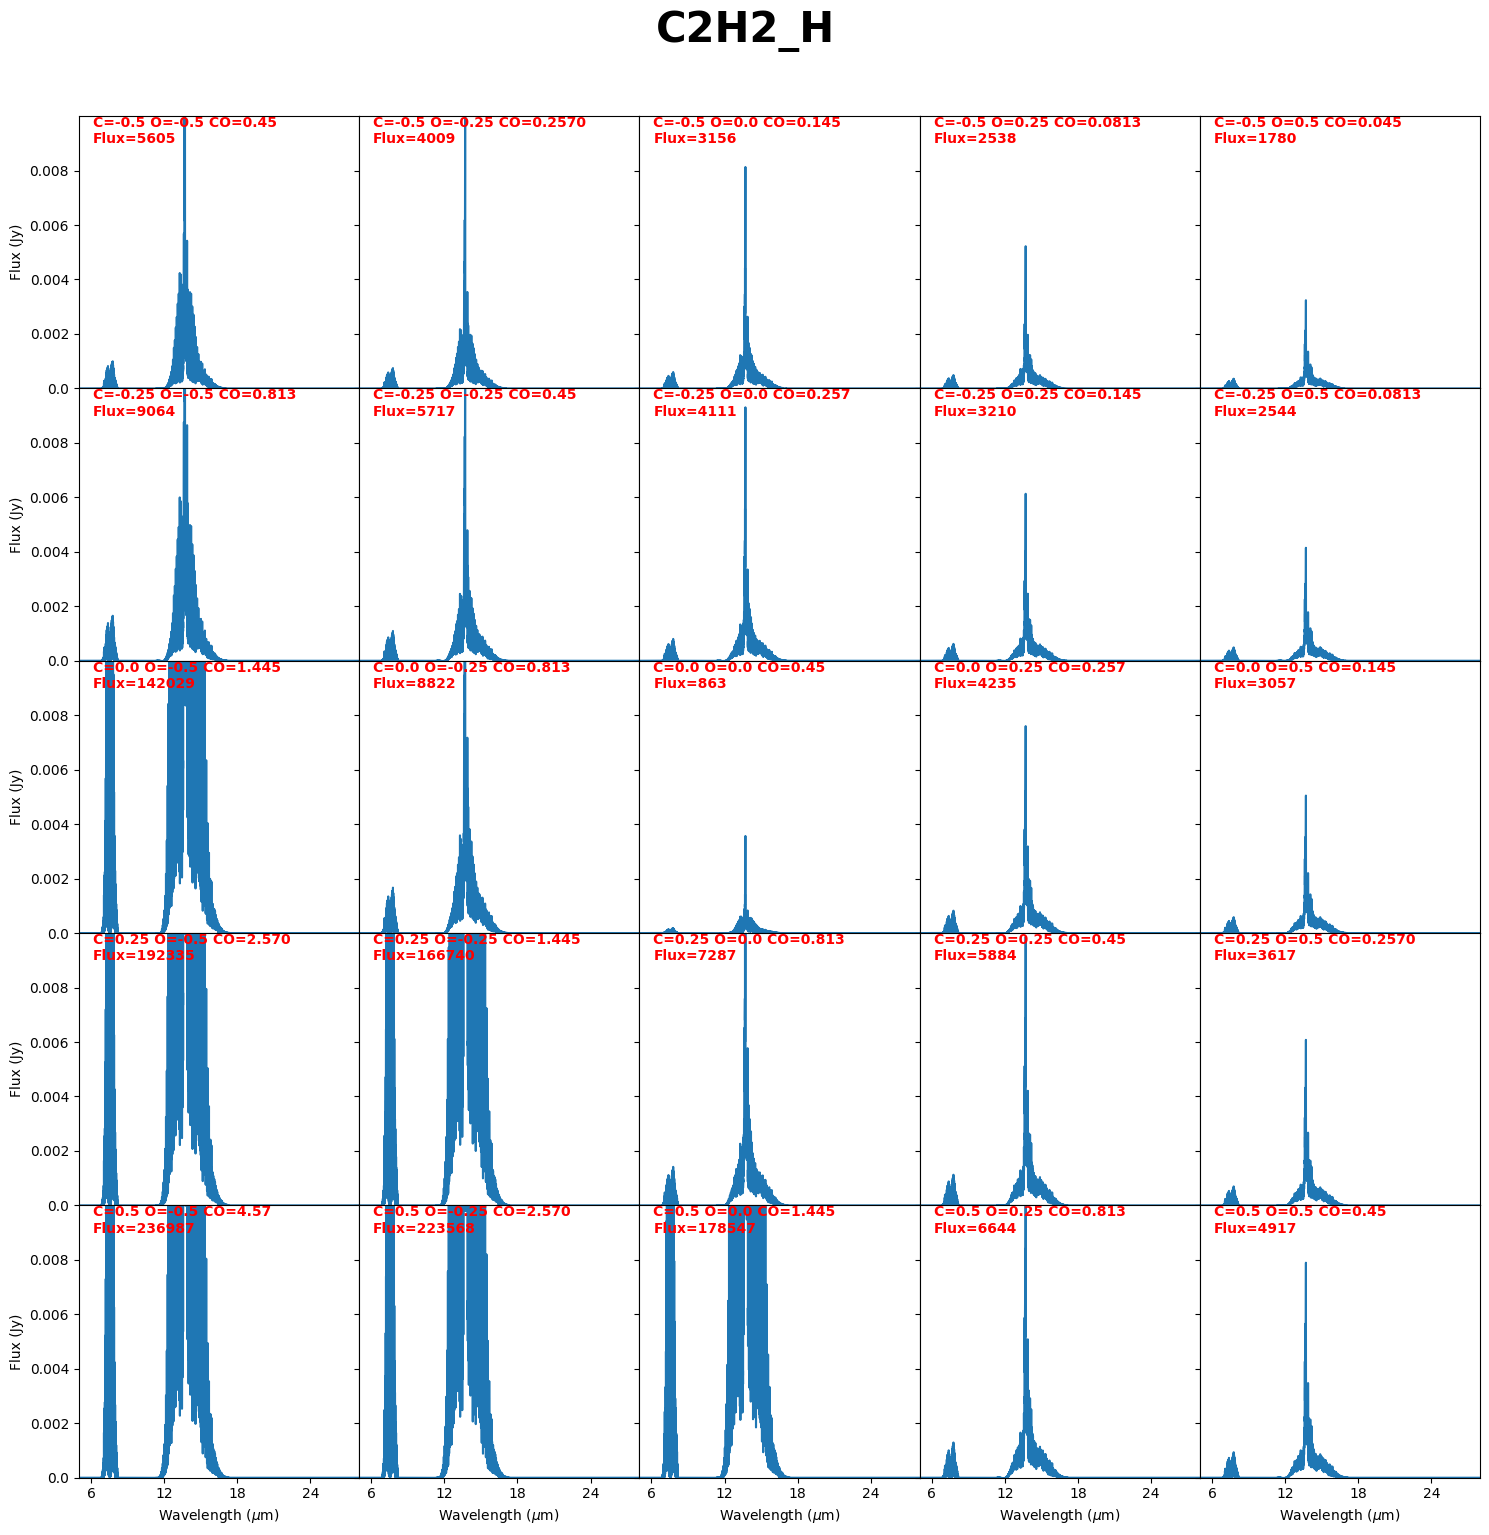

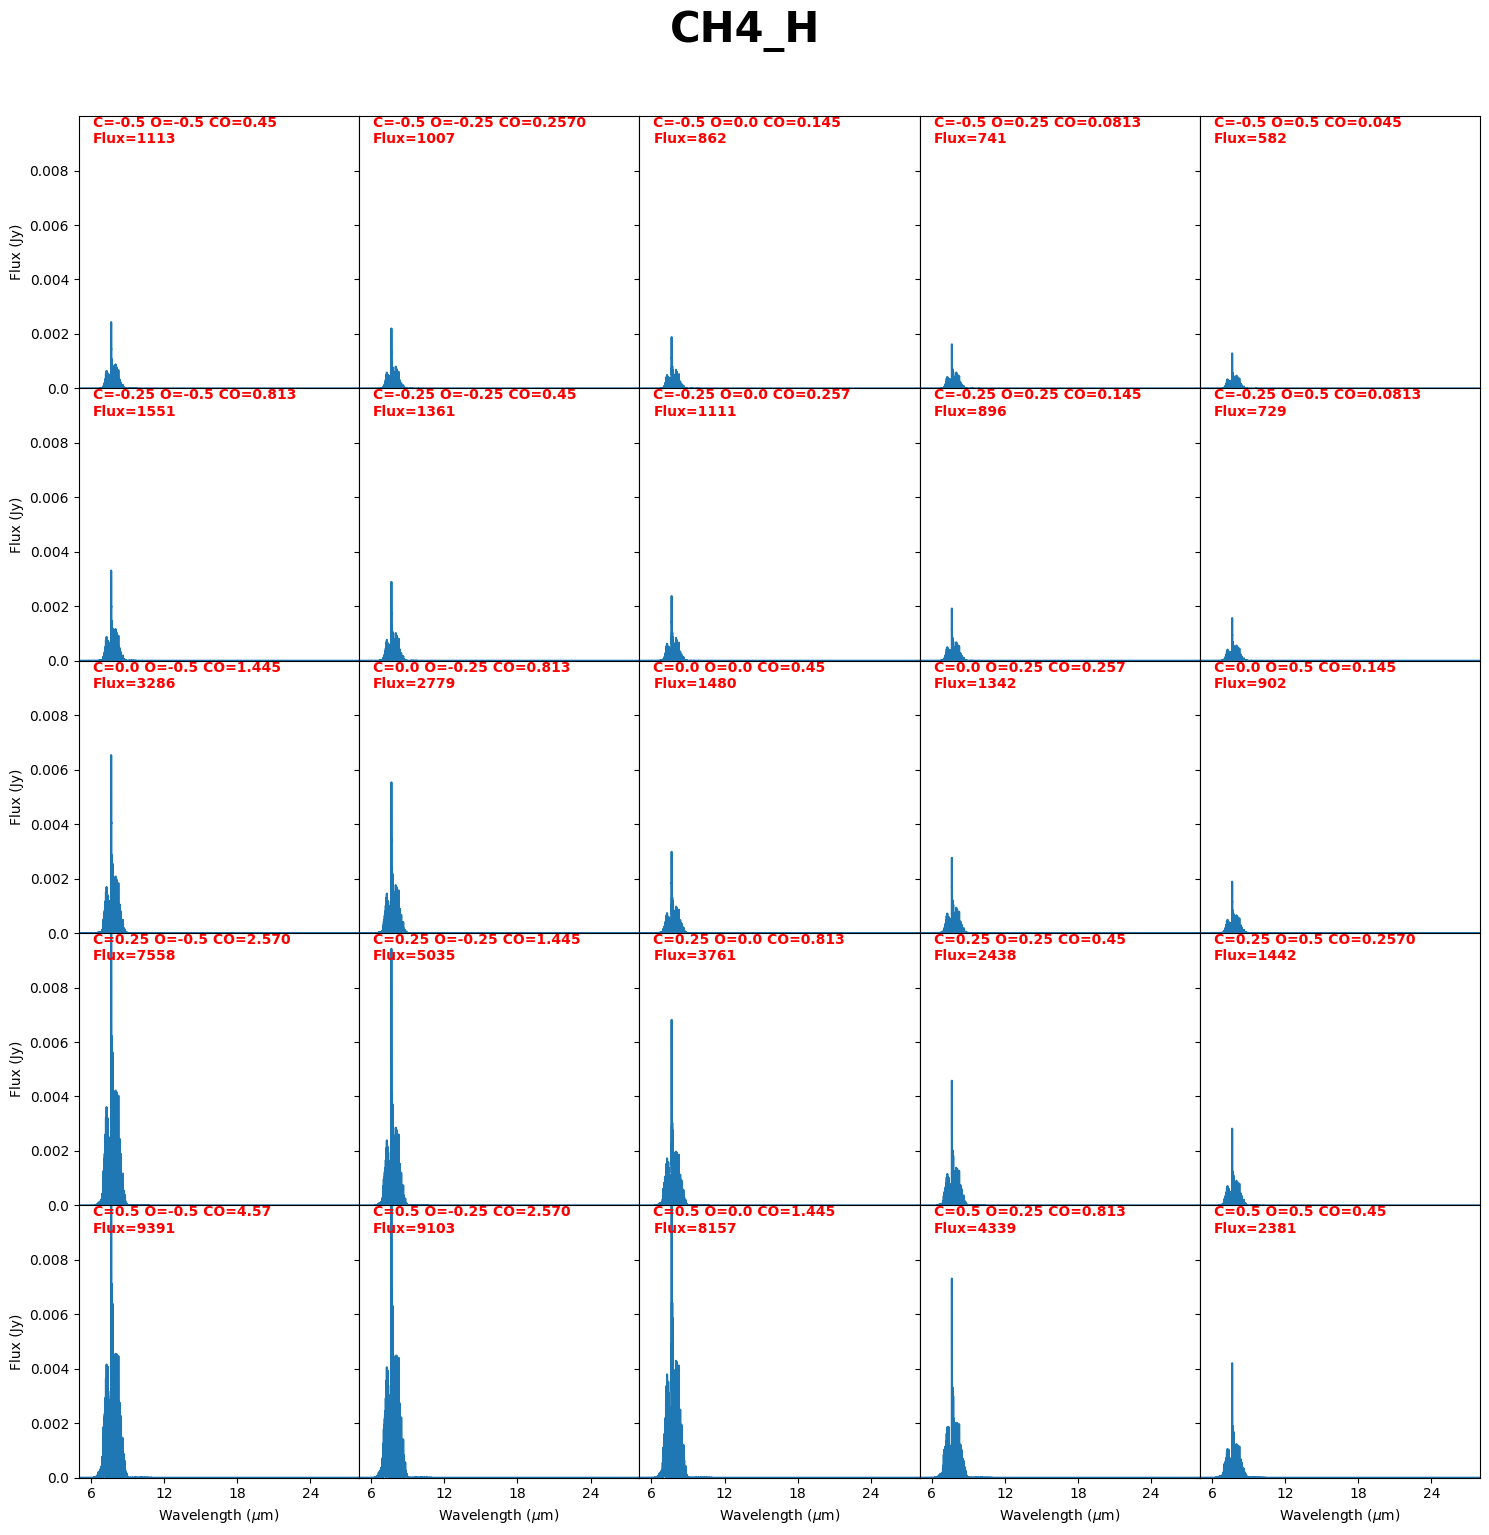

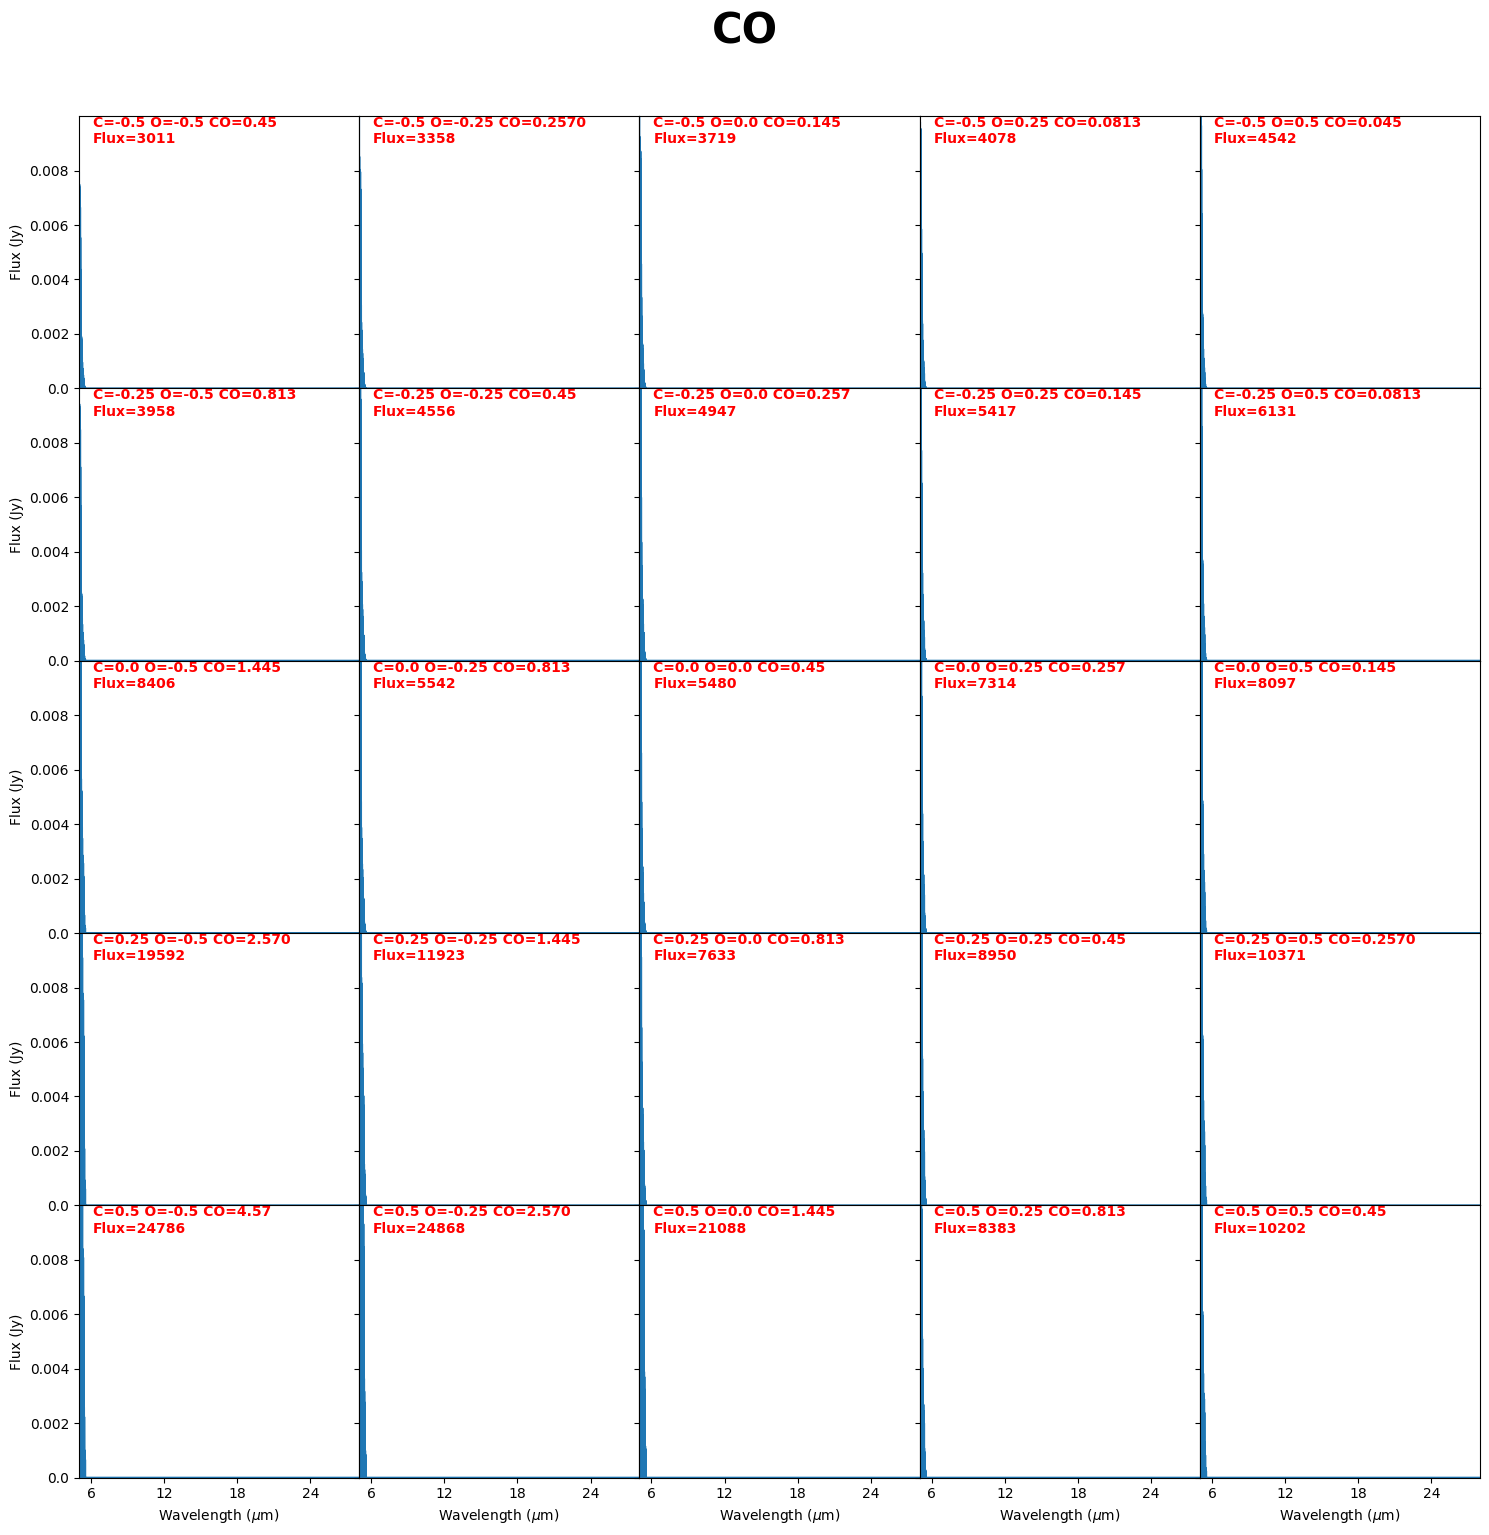

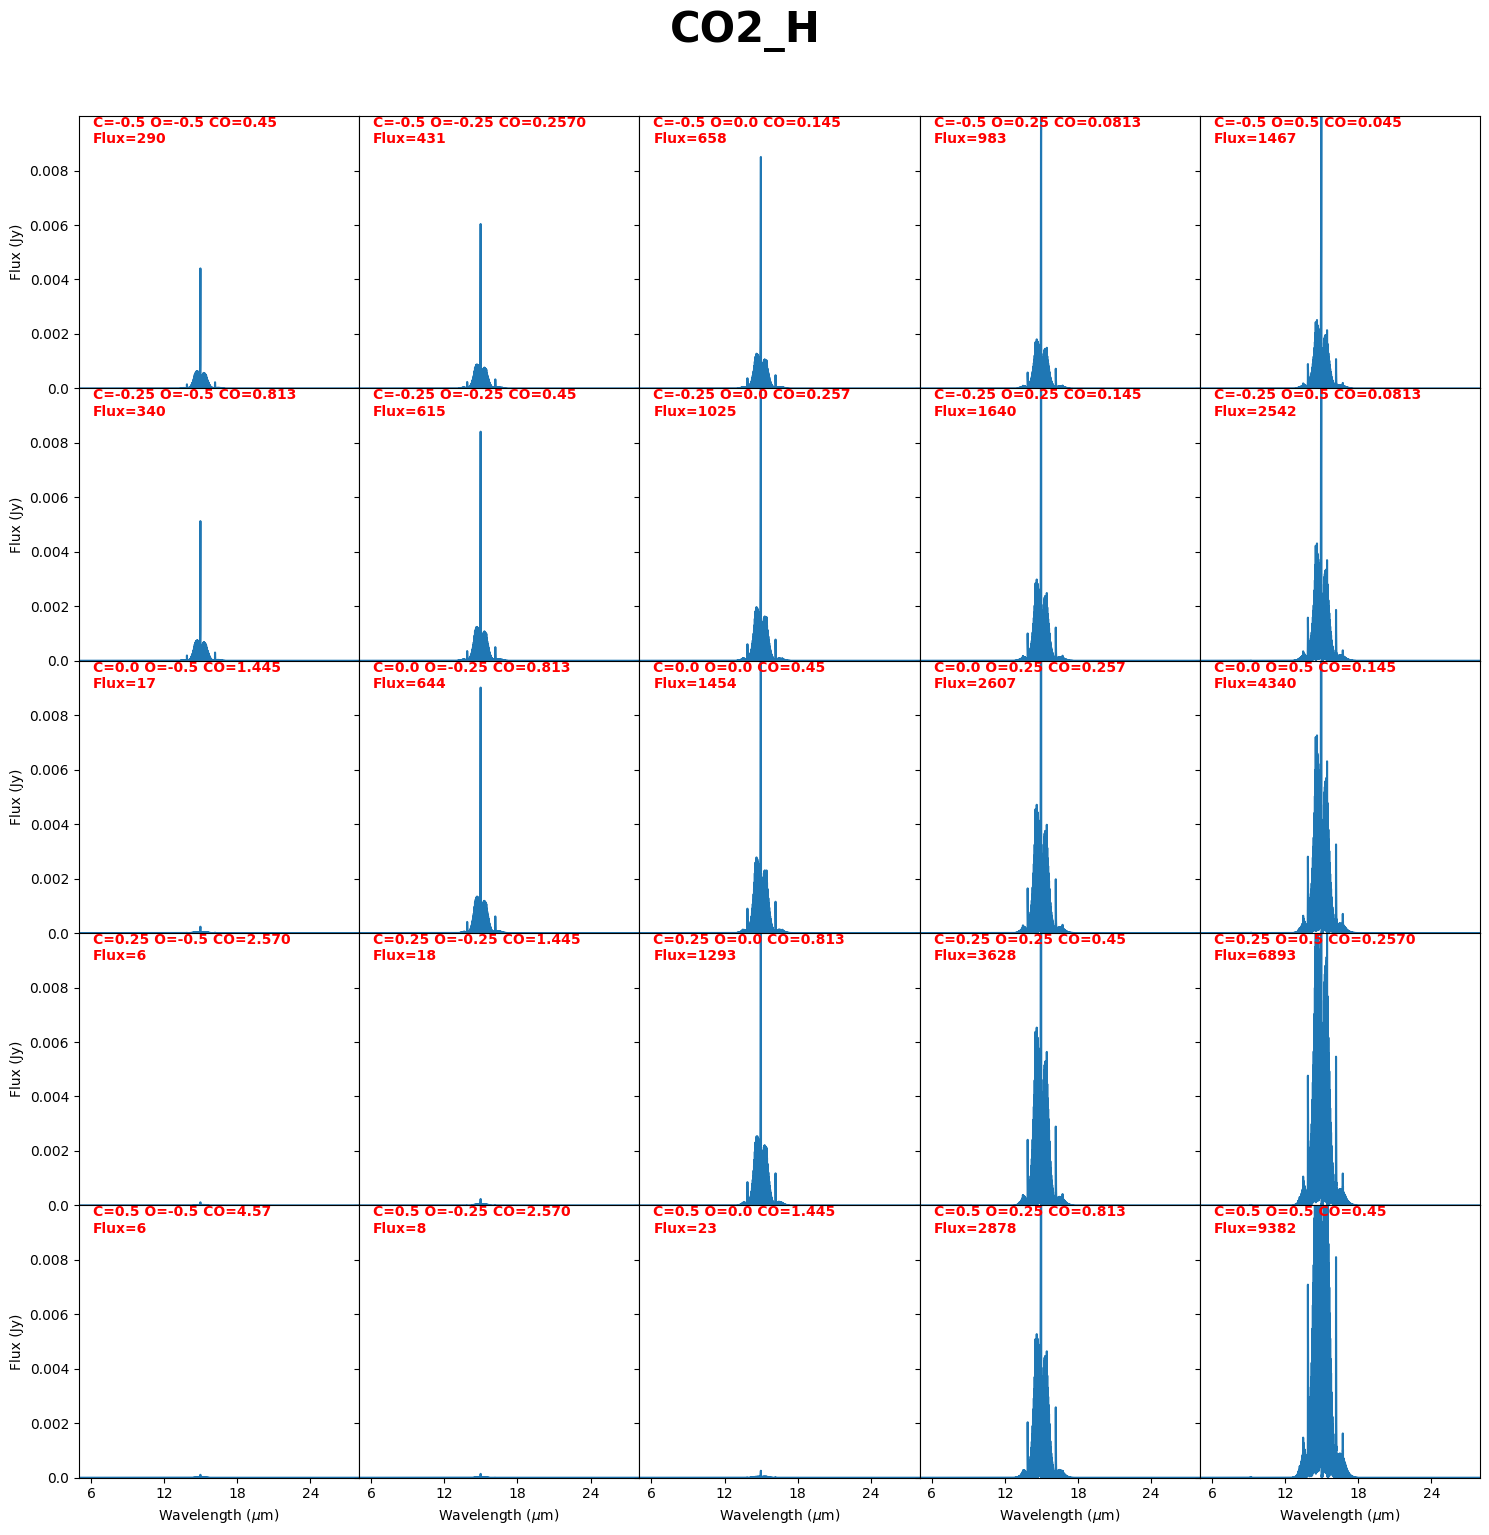

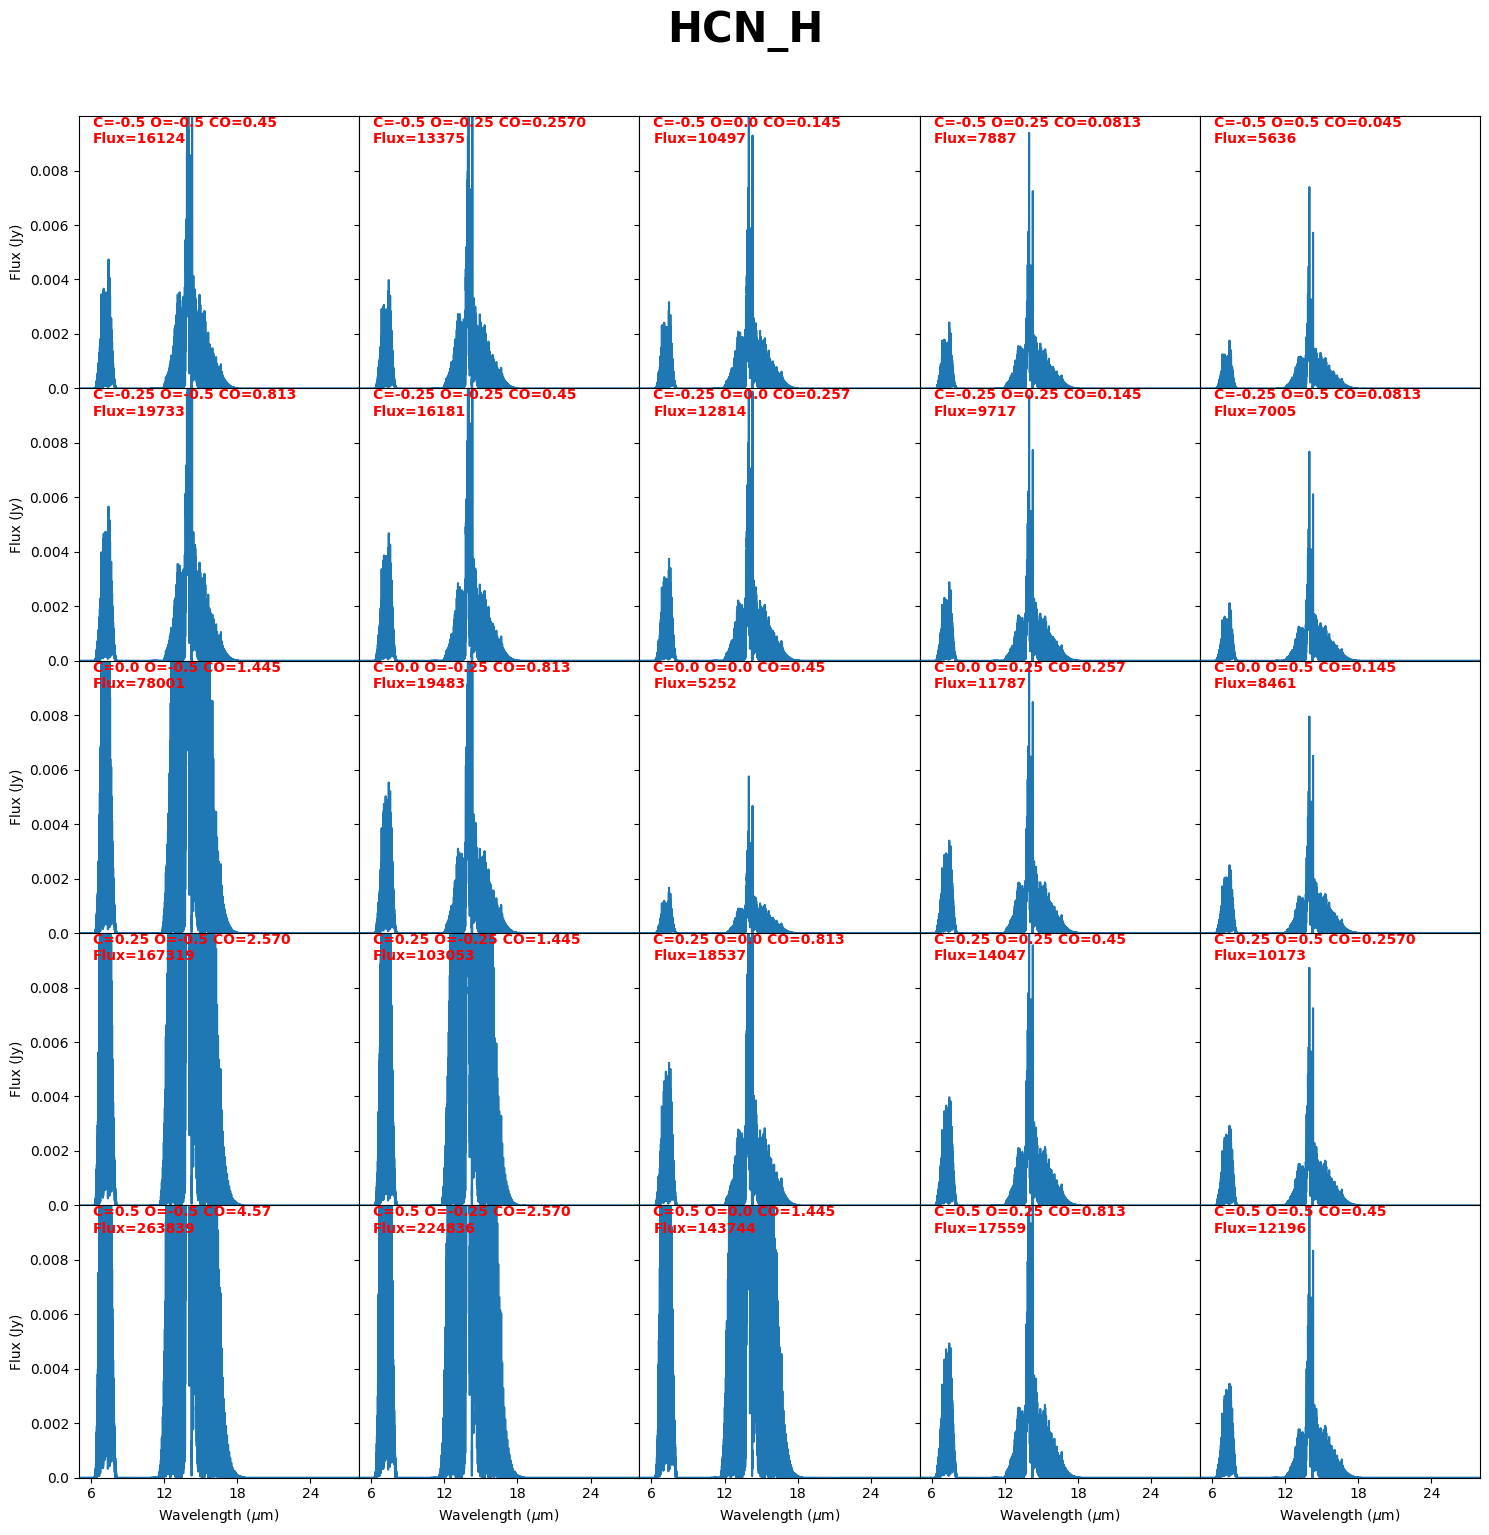

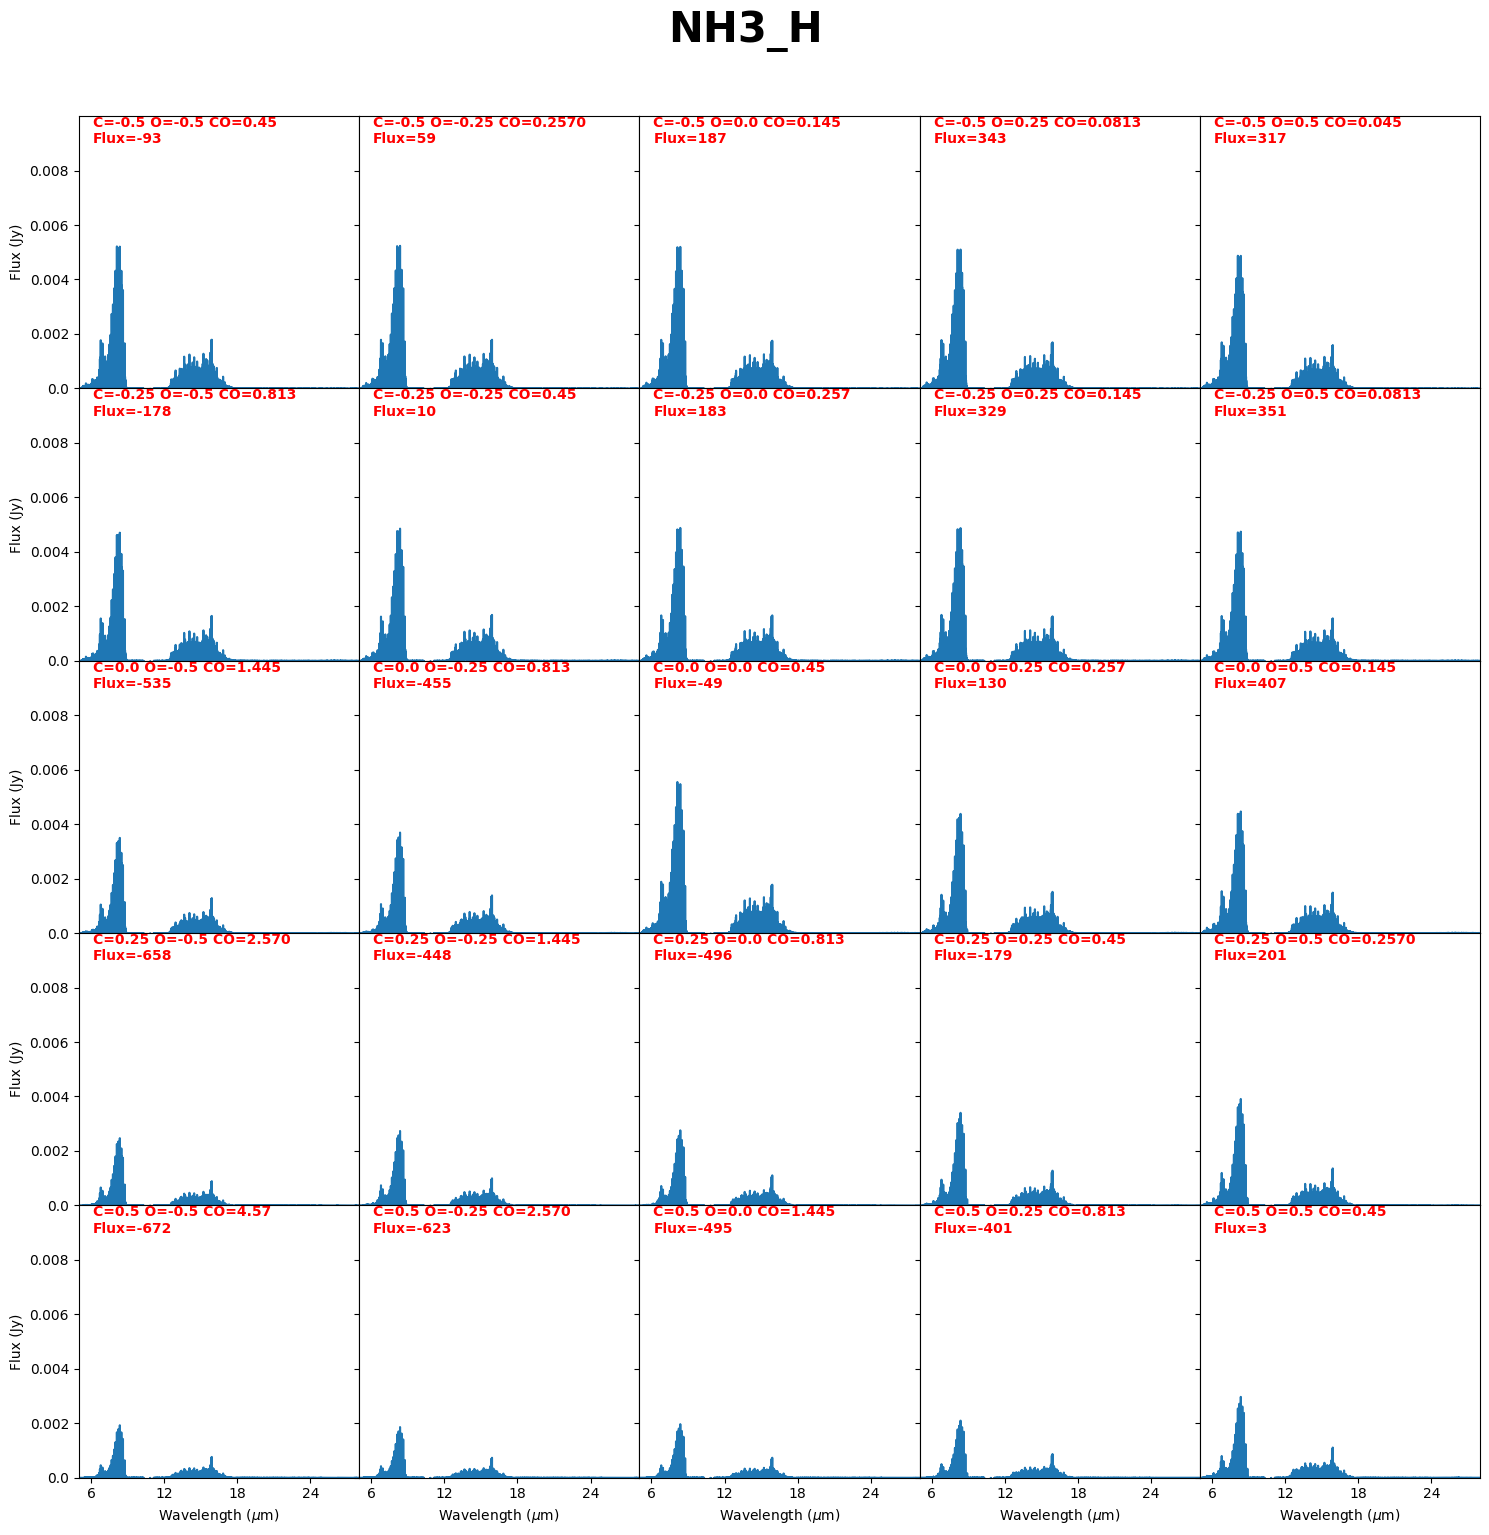

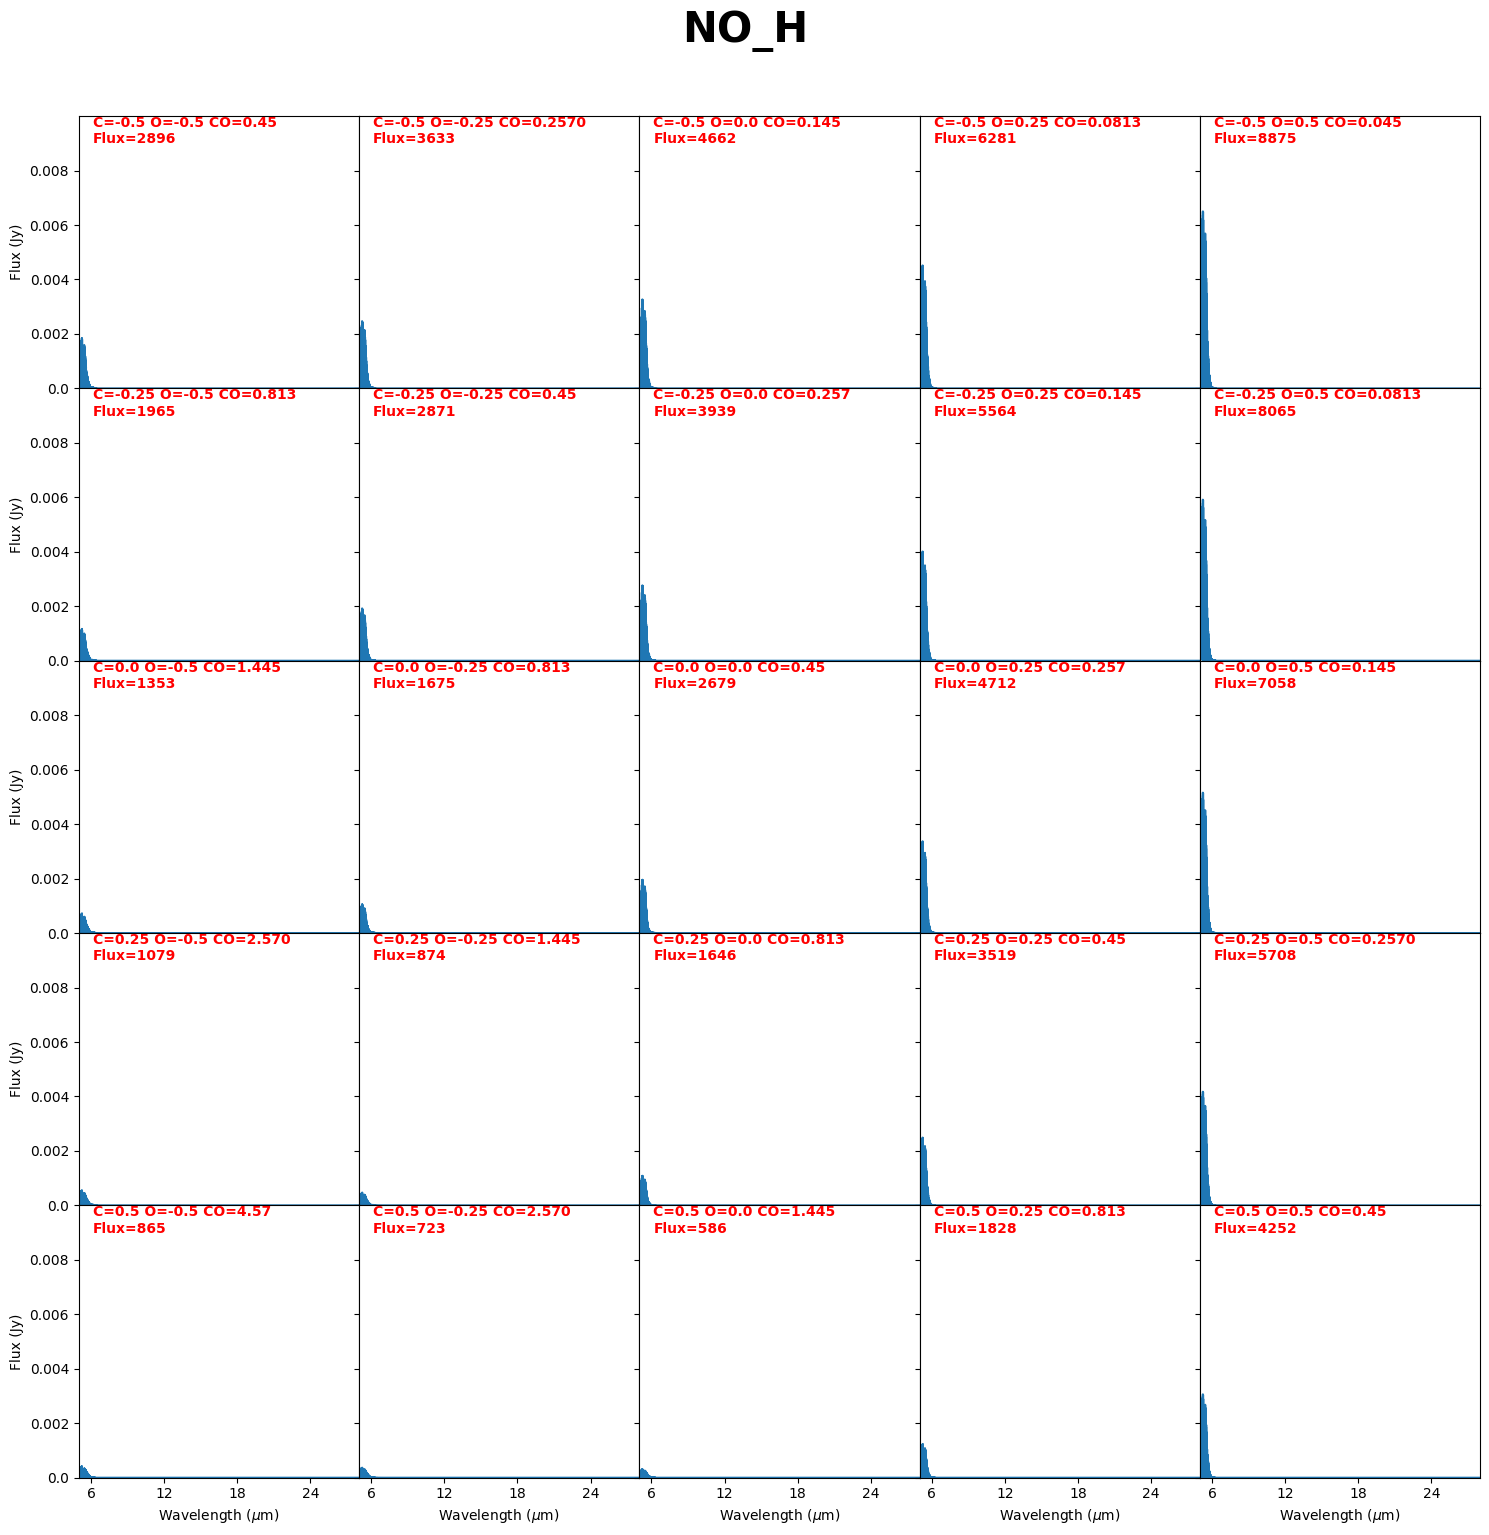

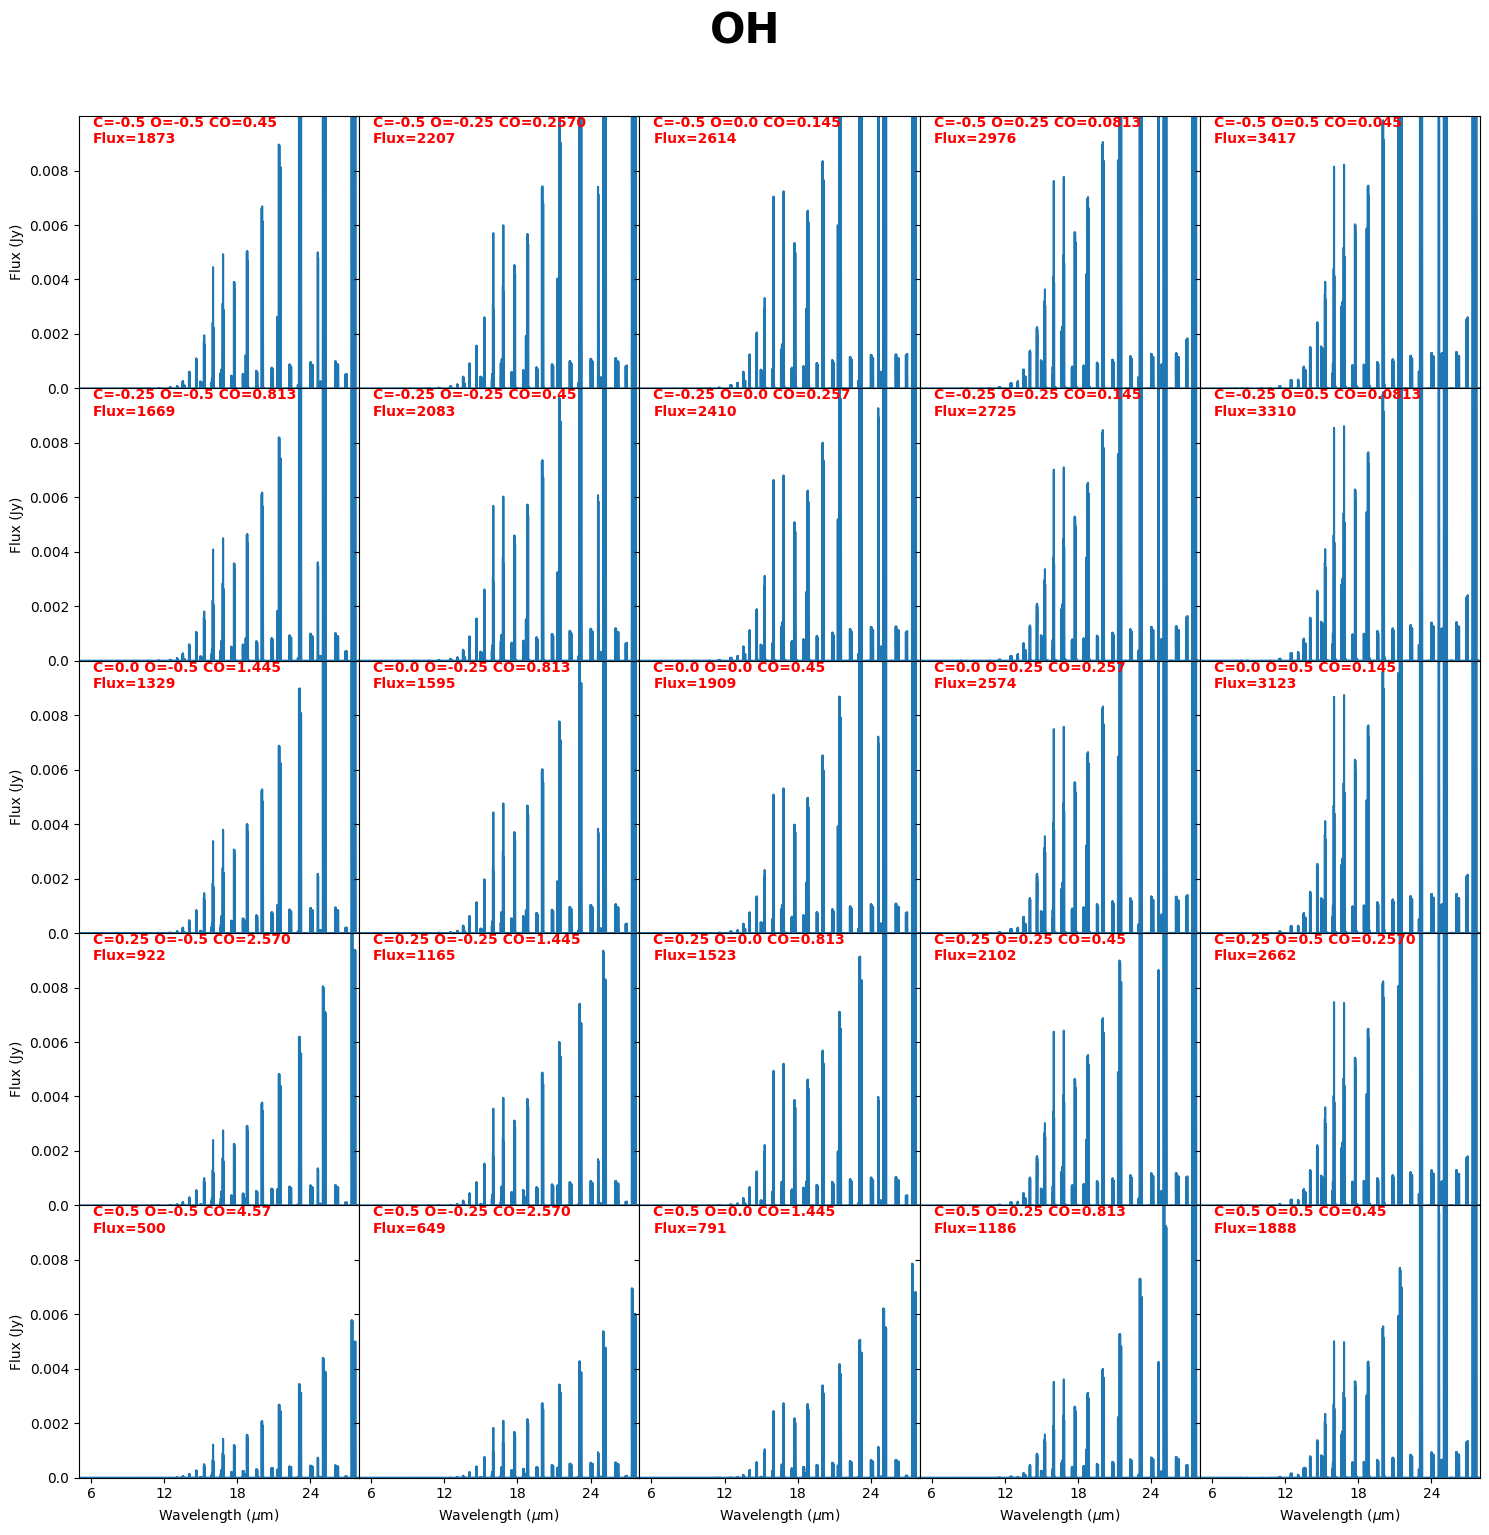

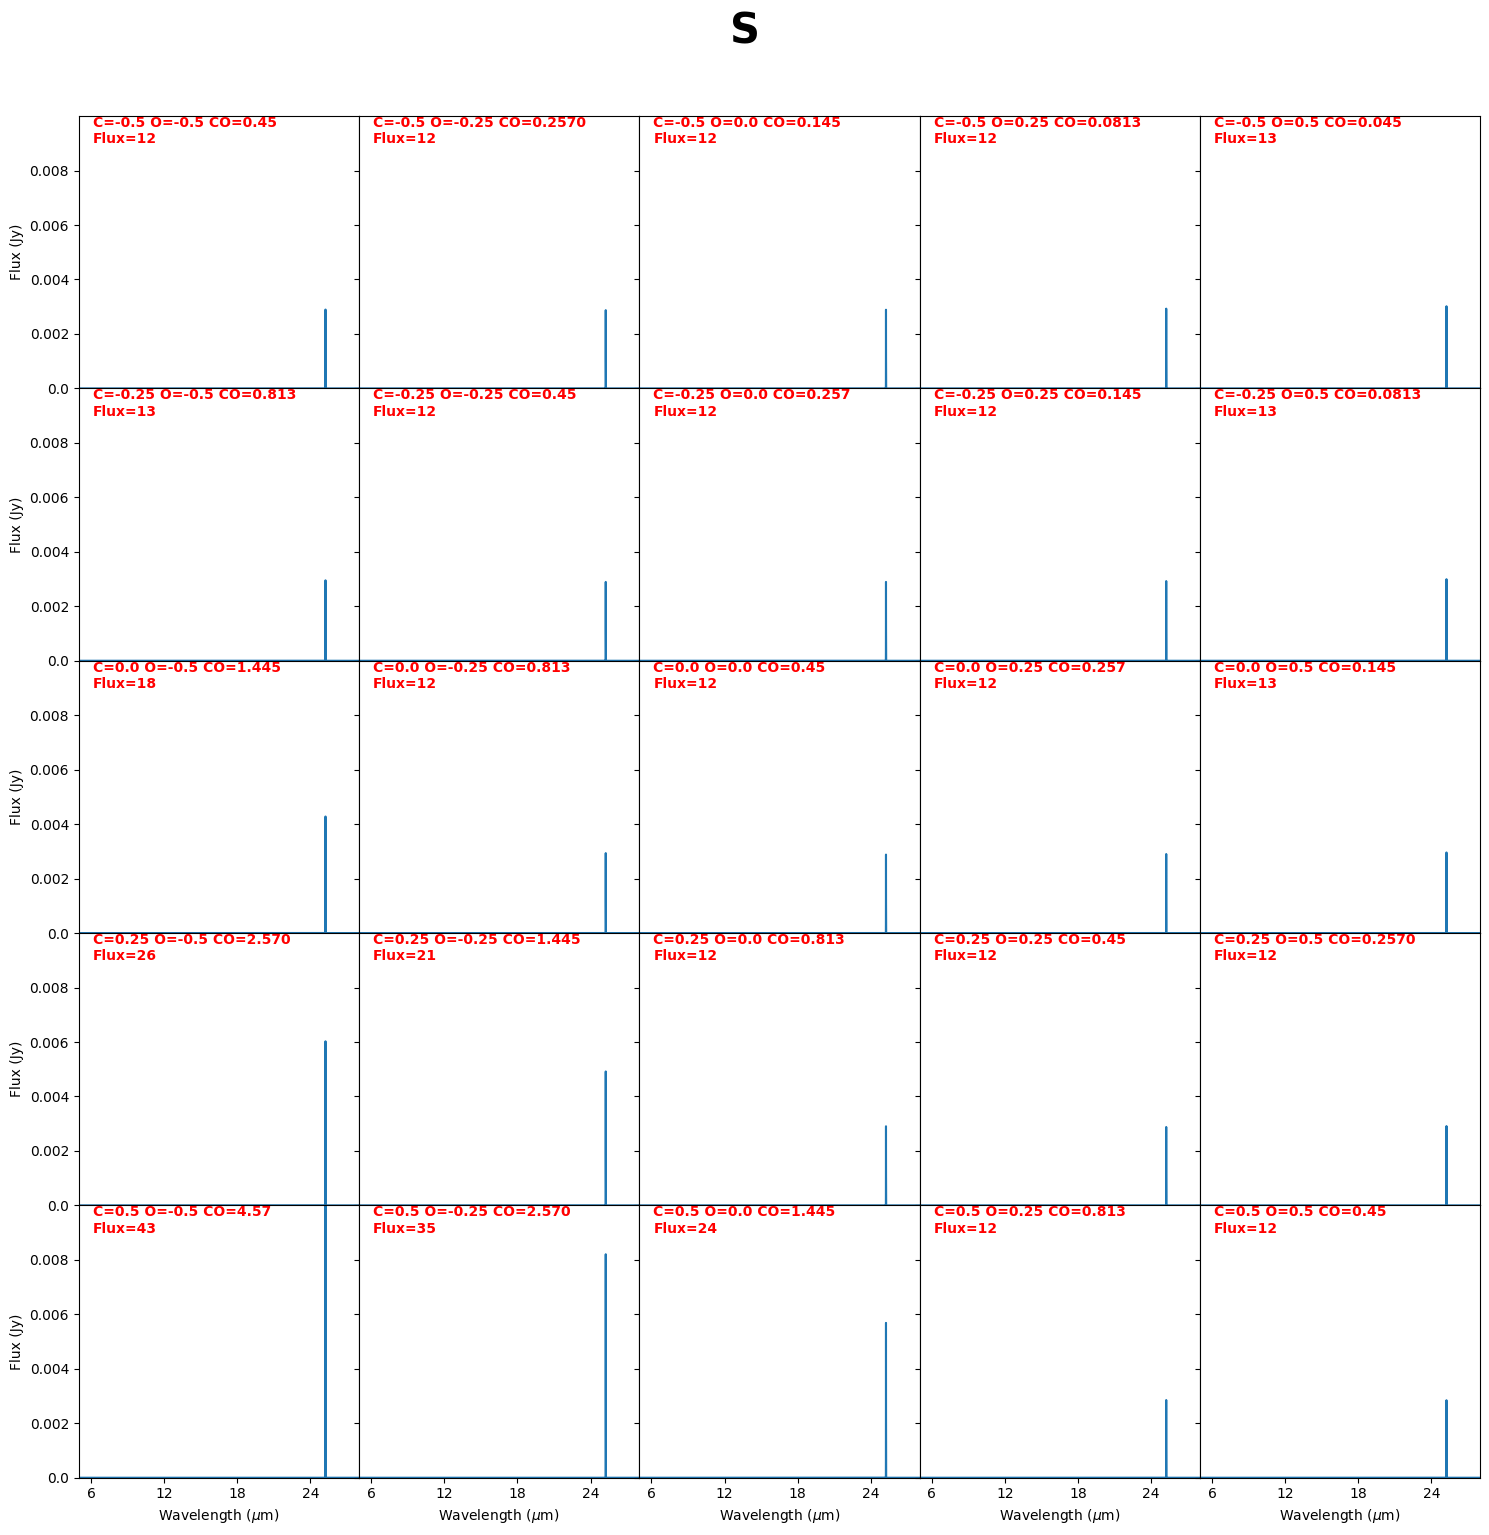

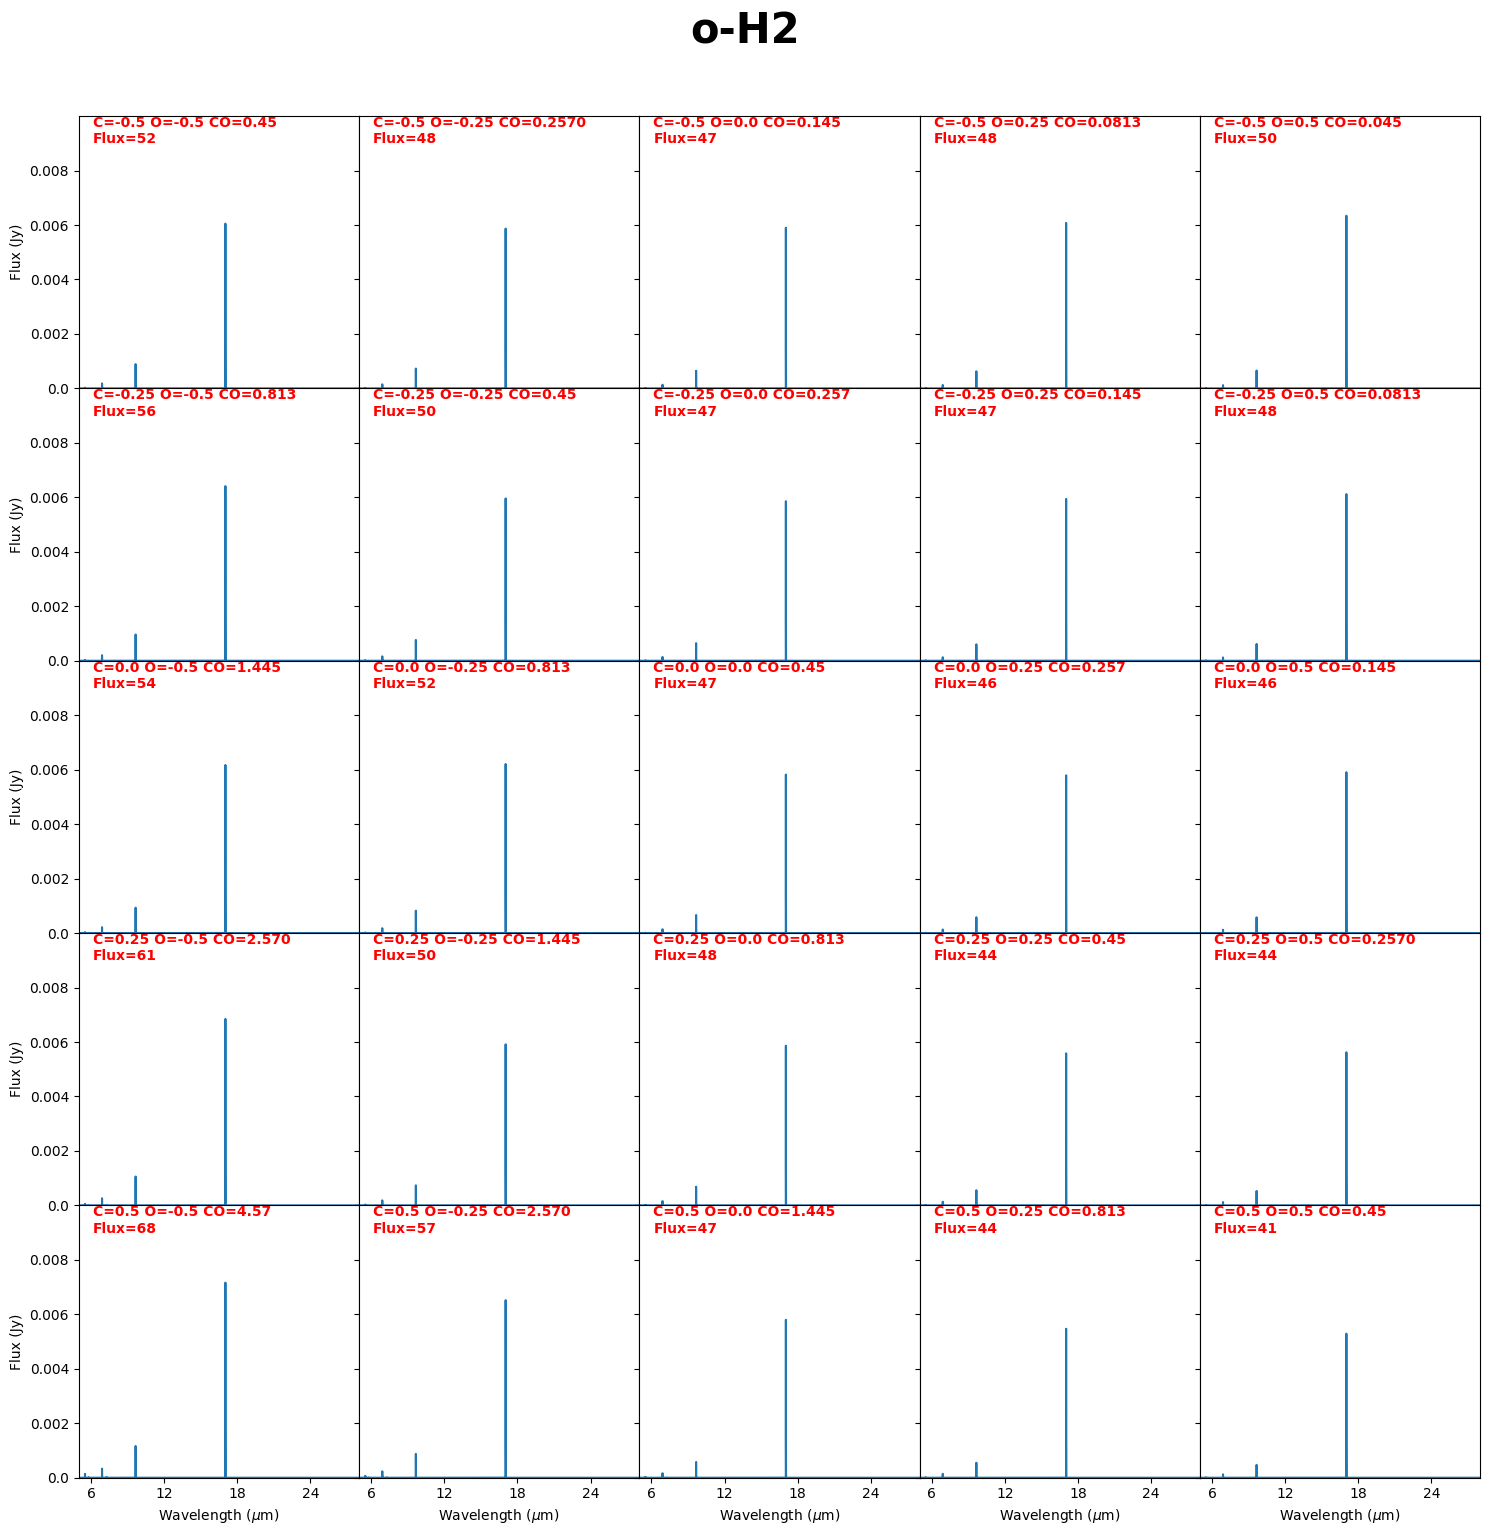

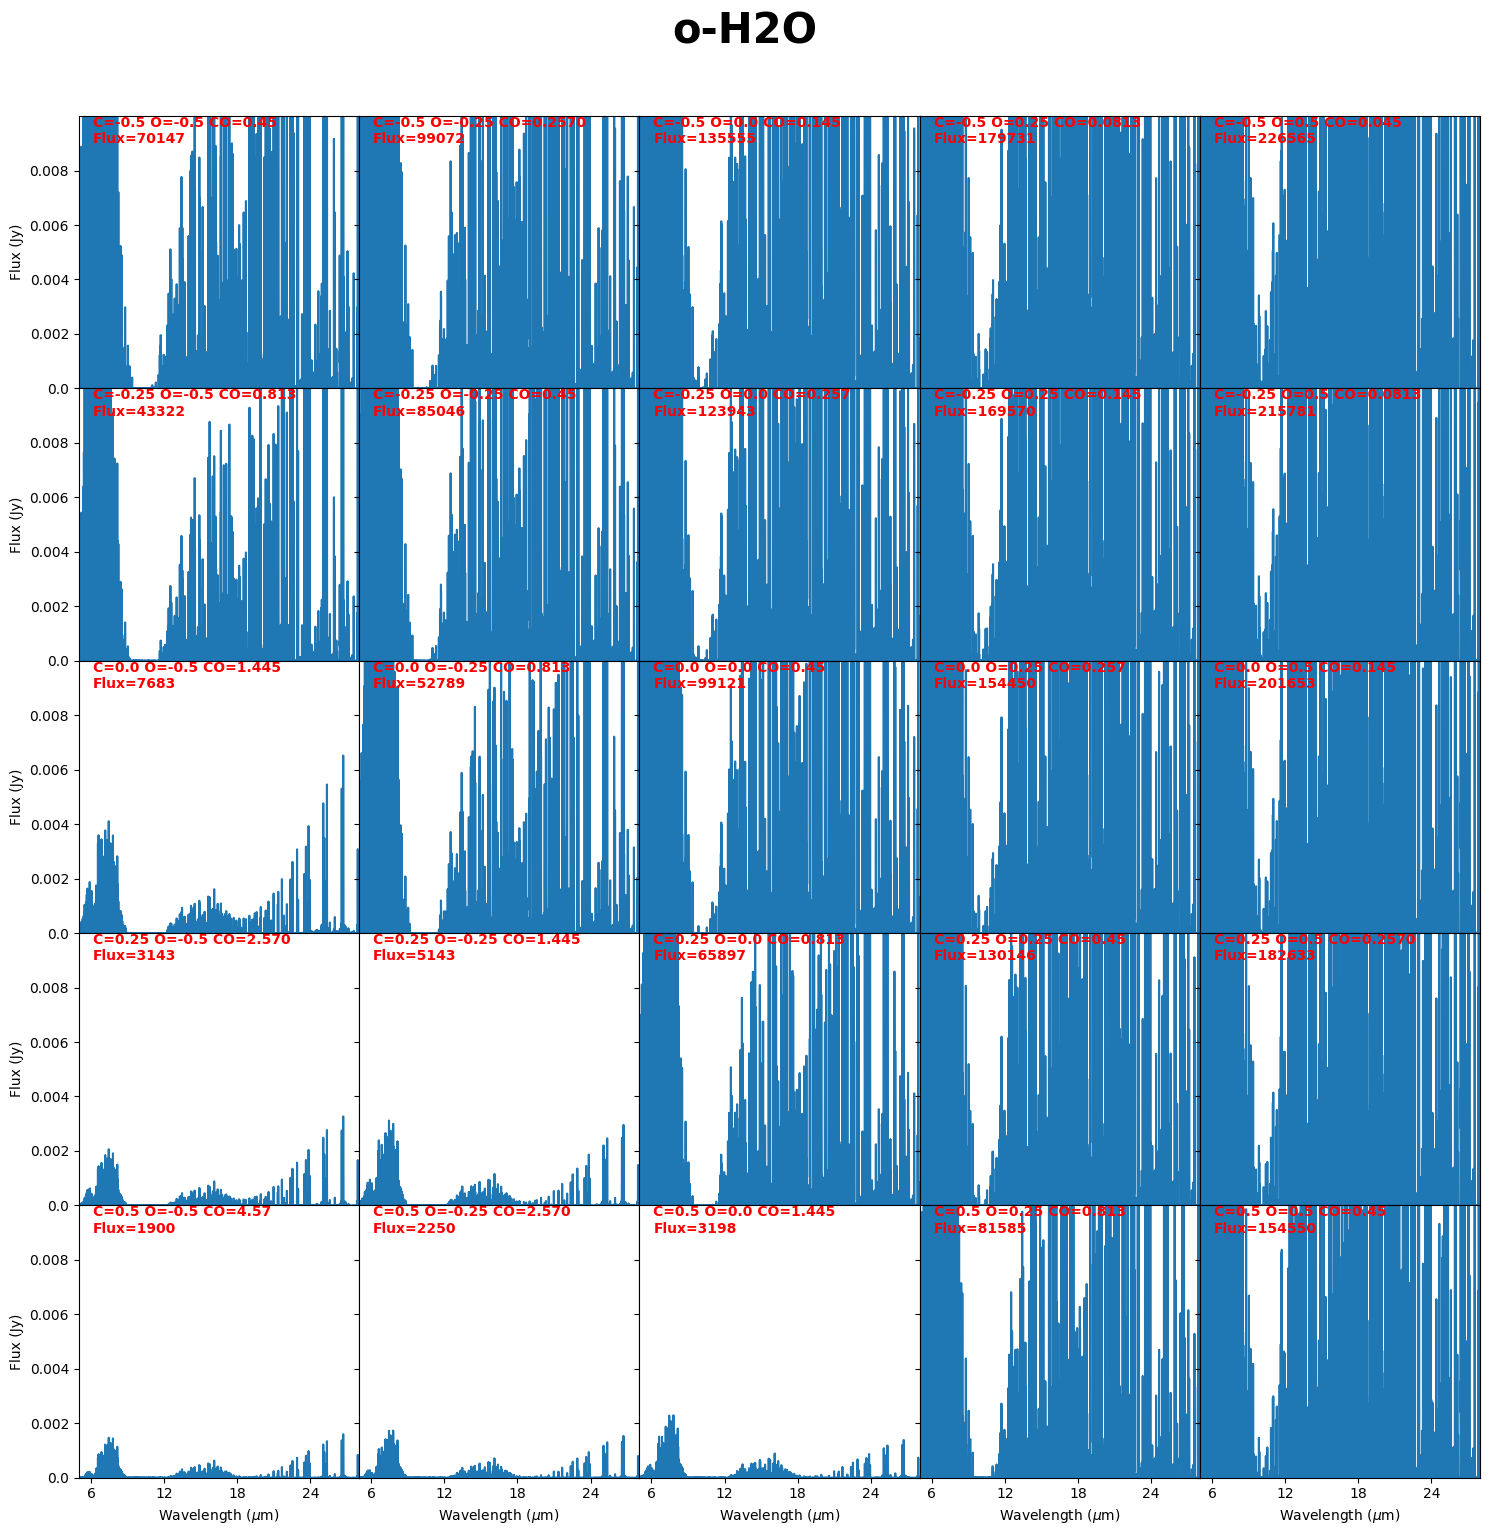

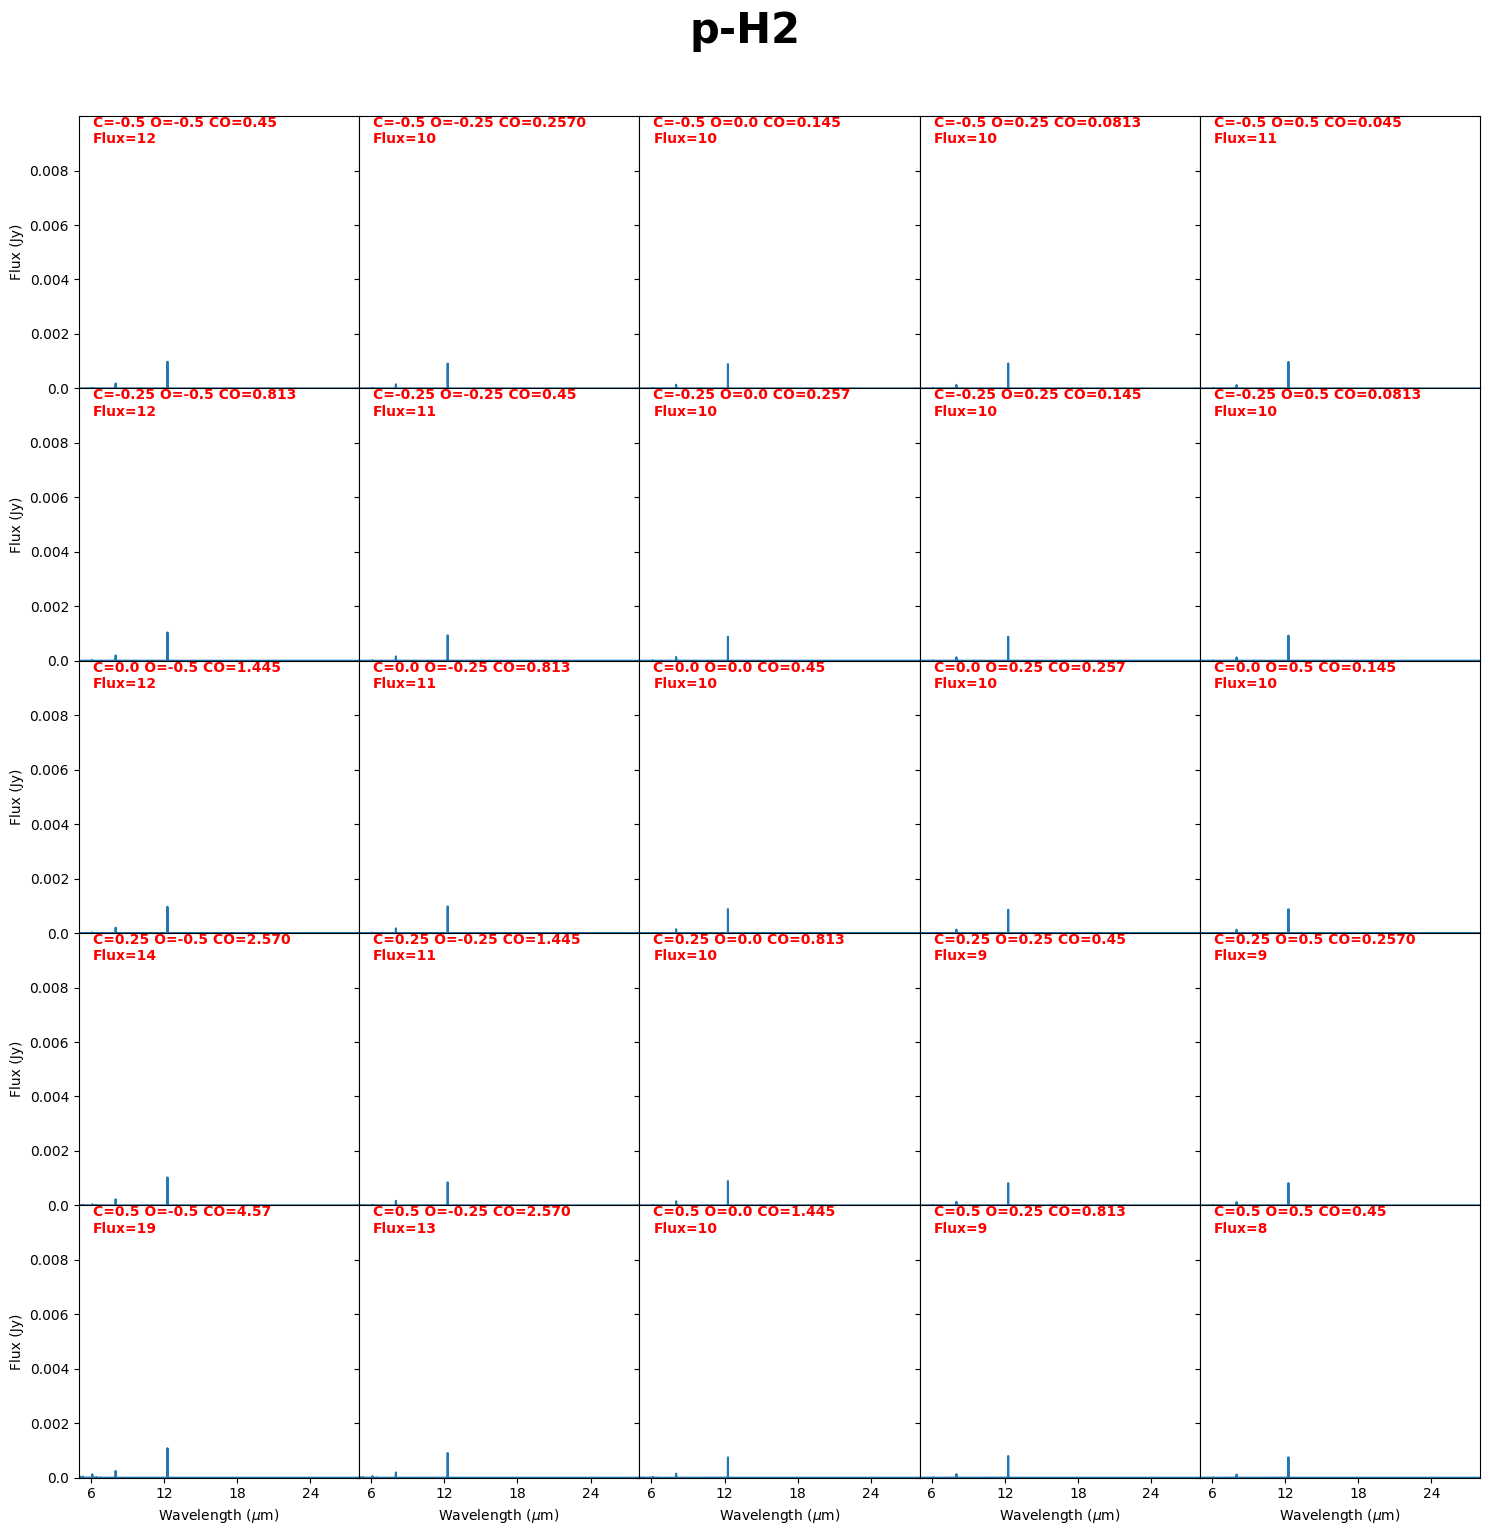

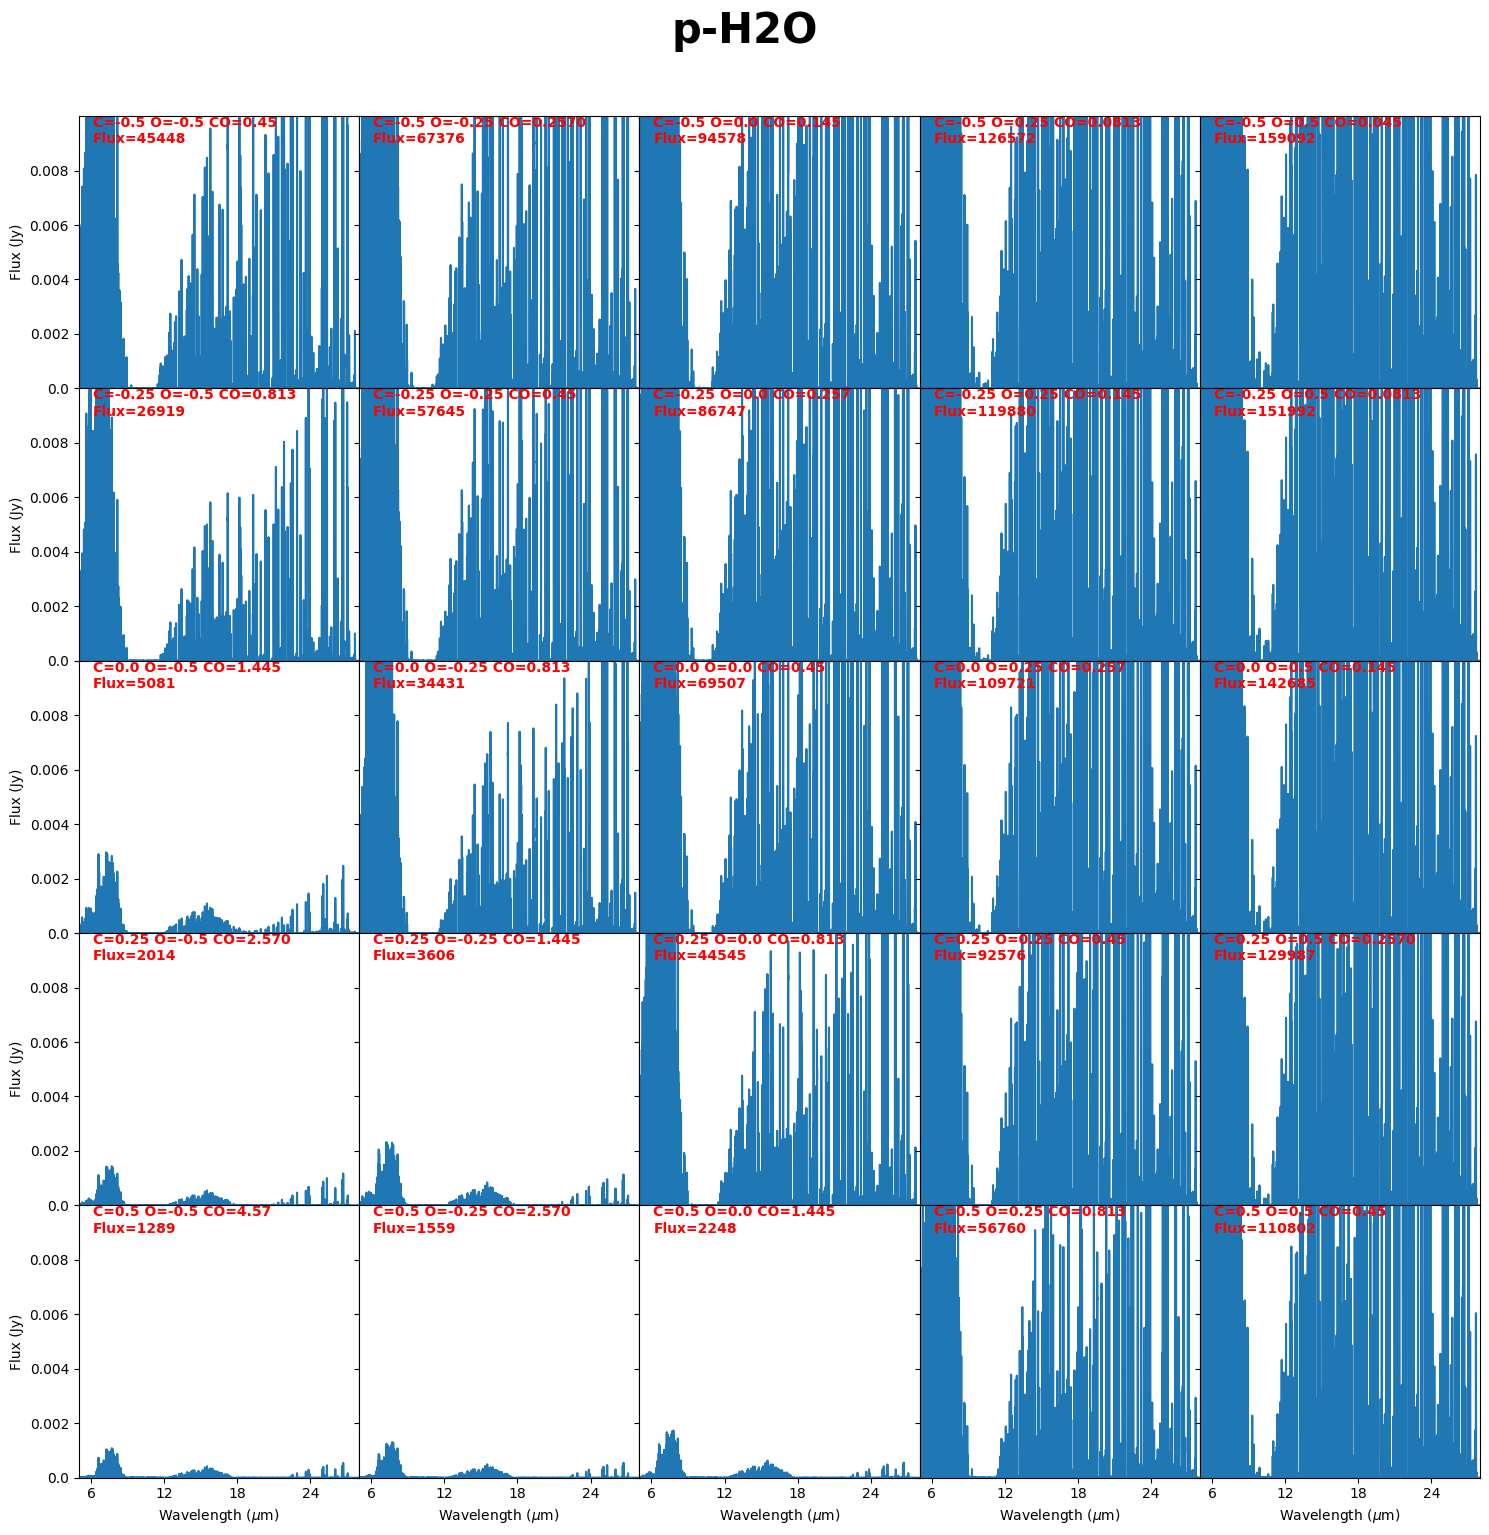

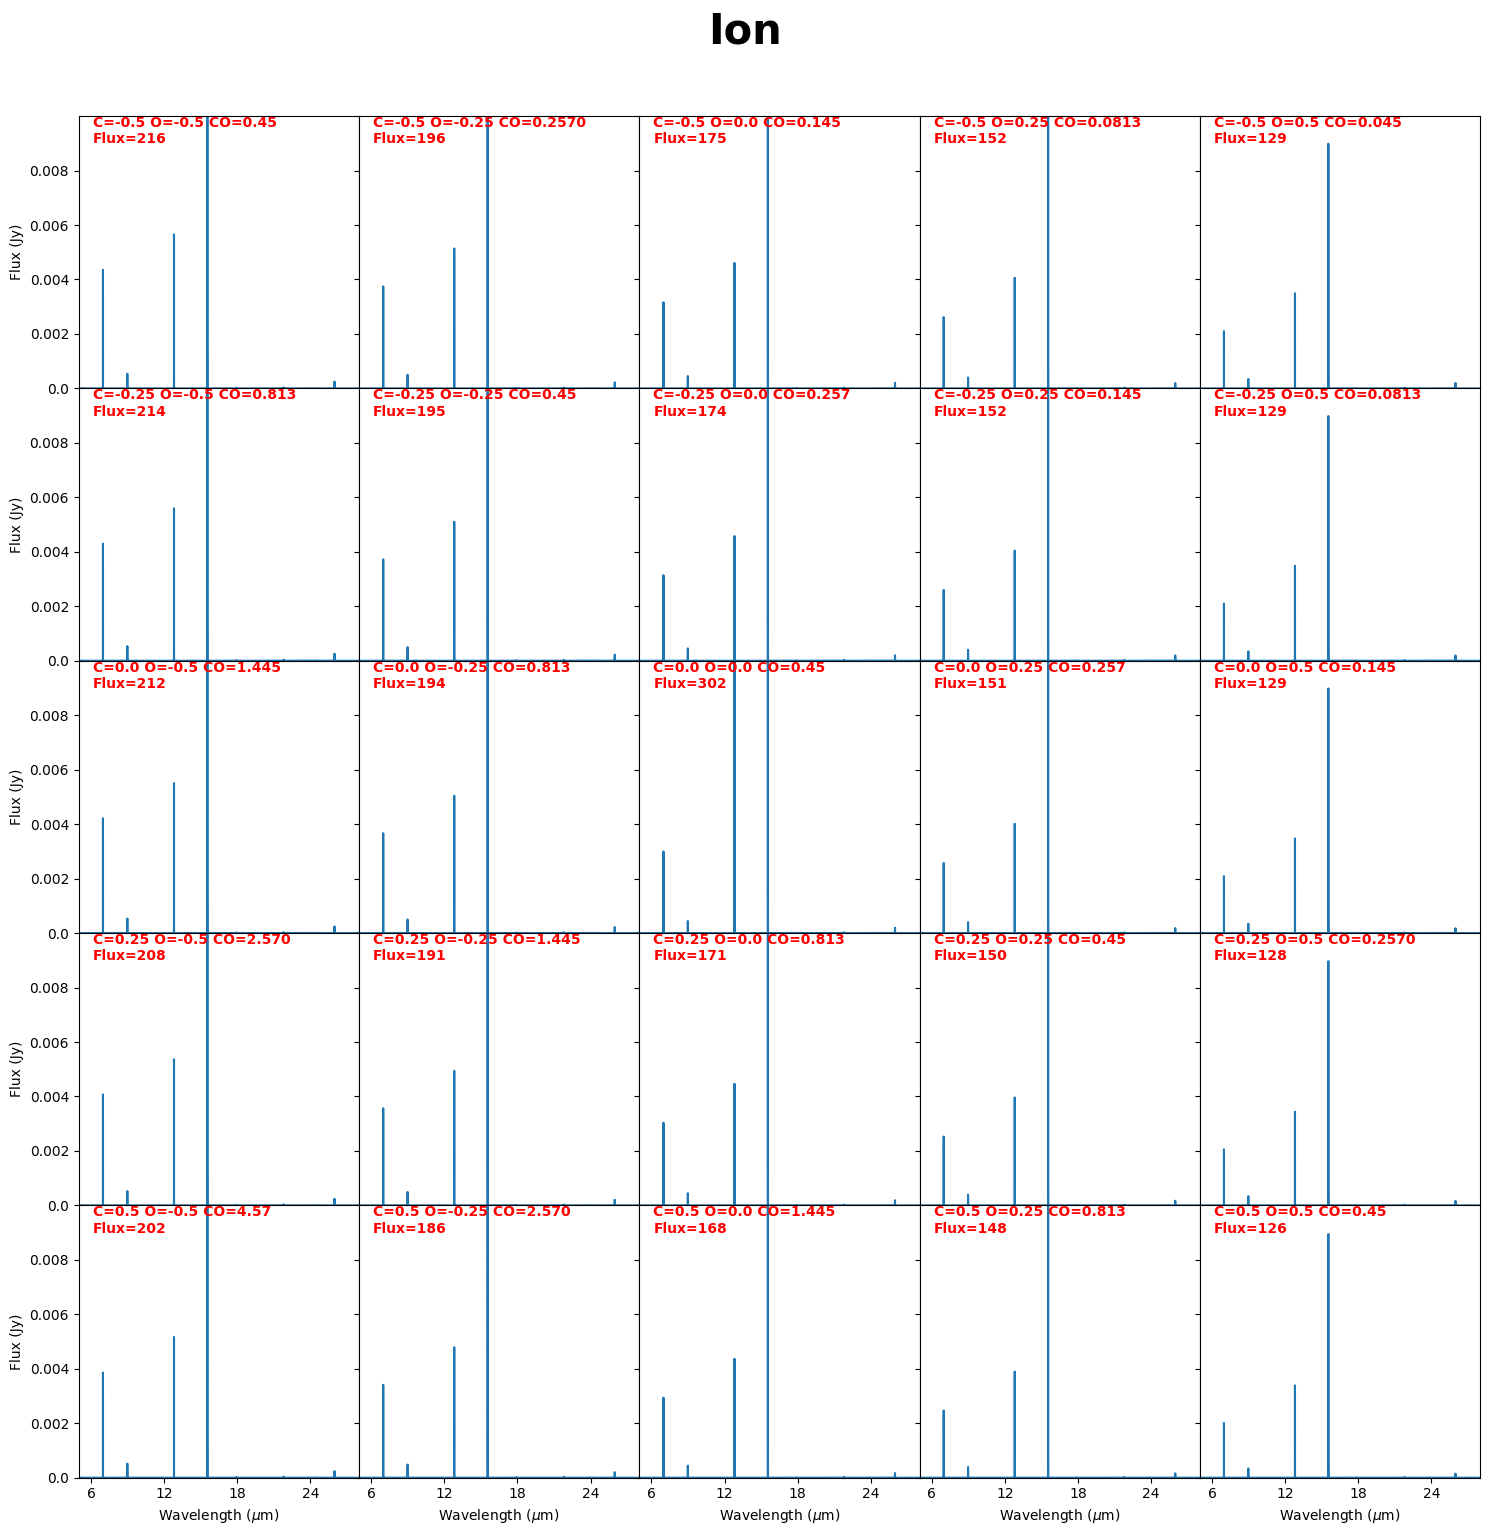

In [38]:
plt.close('all')
wlrange = [5, 28]
flux_lim = 0.01
n_xticks = 5
n_yticks = 5
species = ['C2H2_H', 'CH4_H', 'CO', 'CO2_H', 'HCN_H', 'NH3_H', 'NO_H', 'OH', 'S', 'o-H2', 'o-H2O', 'p-H2', 'p-H2O',
           'Ion']
# species = ['C2H2_H']
for specie in species:
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
    axes = gs.subplots(sharex='col', sharey='row').flatten()
    for i, row in df.iterrows():
        n_row, n_col = divmod(i, 5)
        axes[i].plot(row['Prodimo Wavelength'], row[specie], label=row['Model Name'])
        axes[i].text(wlrange[0] + (wlrange[1] - wlrange[0]) * 0.05, 0.9*flux_lim,
                     f"C={row['C Value']} O={row['O Value']} CO={row['CO Value']} \nFlux={total_flux(row['Prodimo Wavelength'], row[specie]):.0f}", fontsize=10, color='red',
                     weight='bold')
        axes[i].set_xlim(wlrange)
        axes[i].set_ylim([0, flux_lim])
        if n_row == 4:
            axes[i].set_xlabel(r"Wavelength ($\mu$m)")  # Bottom row
            axes[i].set_xticks([6, 12, 18, 24])
            axes[i].set_xticklabels([6, 12, 18, 24])
        if n_col == 0:
            axes[i].set_ylabel("Flux (Jy)")
            axes[i].set_yticks(np.linspace(0, 0.8*flux_lim, n_yticks))
            axes[i].set_yticklabels(np.linspace(0, 0.8*flux_lim, n_yticks))
    fig.suptitle(specie, fontsize=30, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('figures/' + specie + '_total_spec.pdf')
    plt.show()

C:\Users\niels\AppData\Local\Temp\ipykernel_11880\2258432381.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(5, 5))


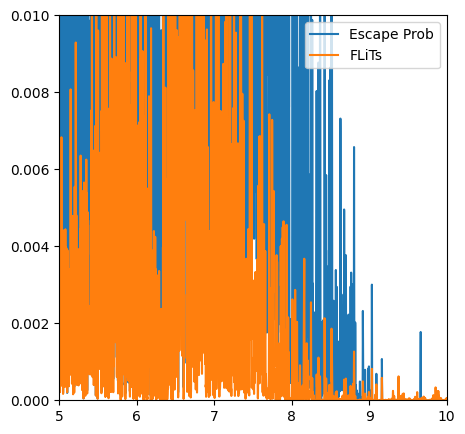

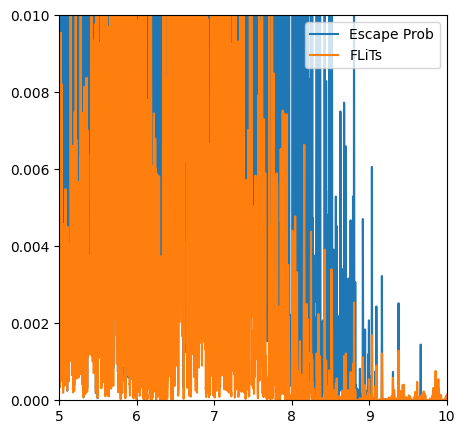

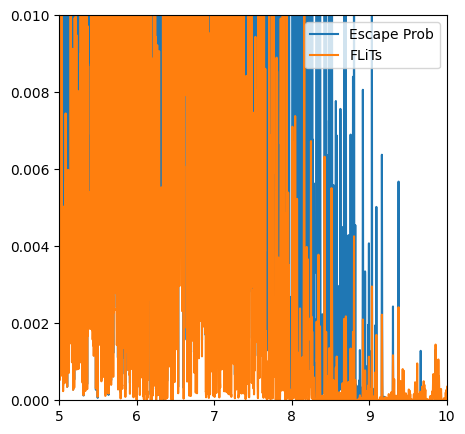

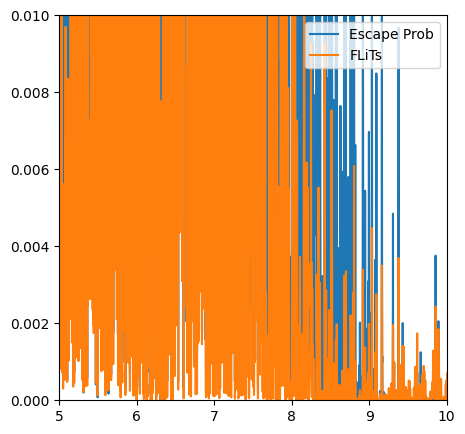

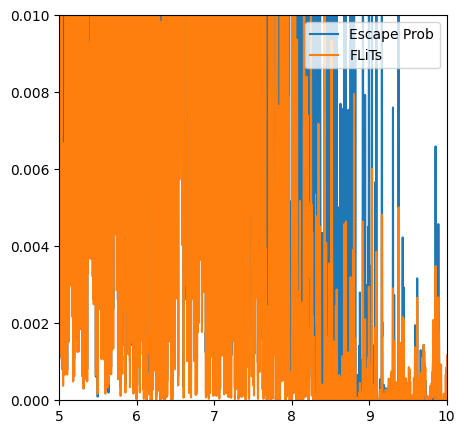

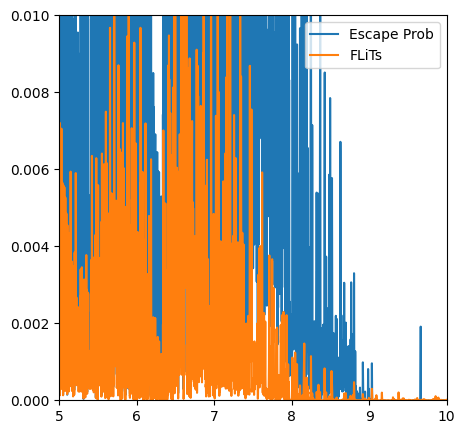

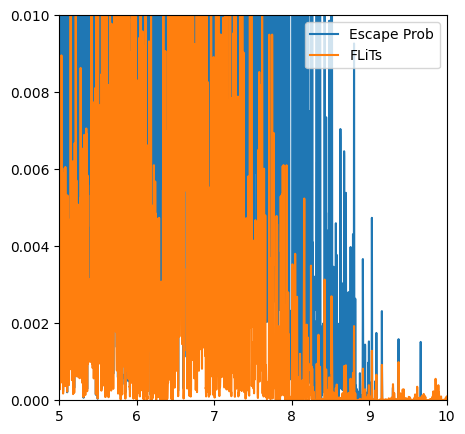

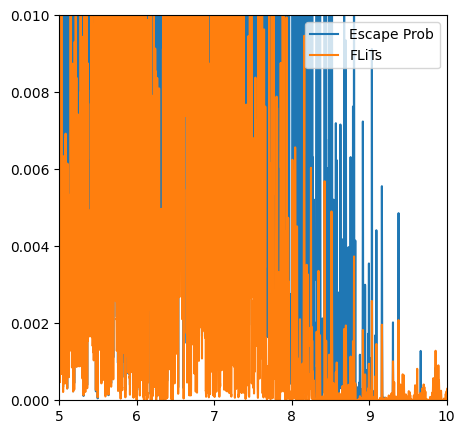

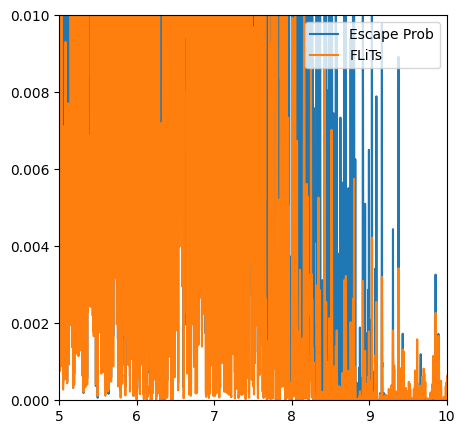

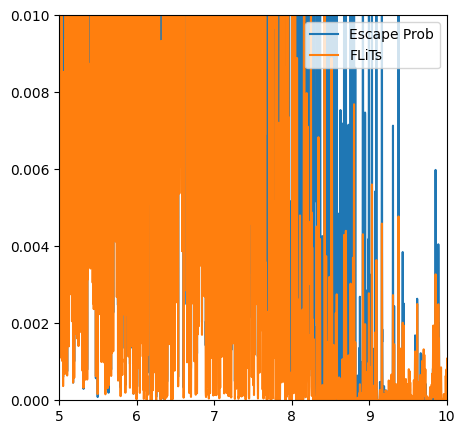

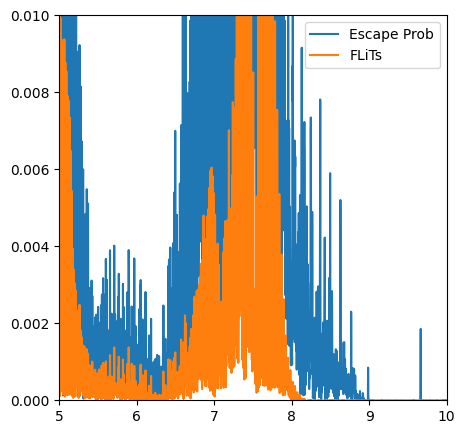

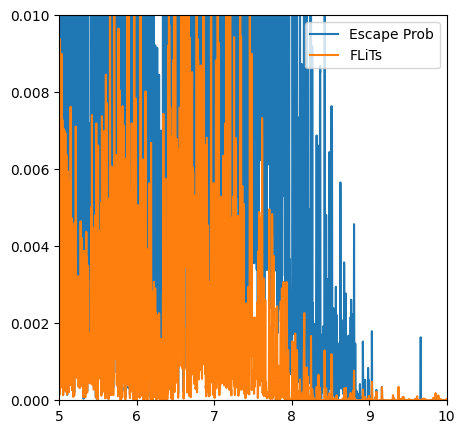

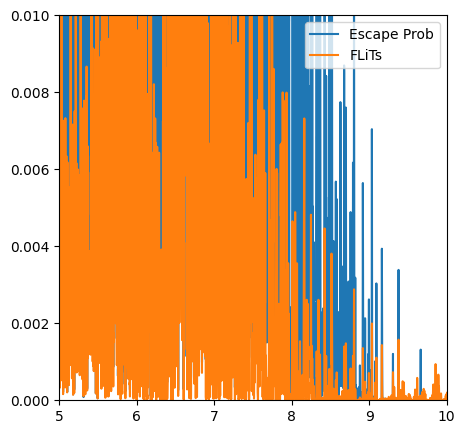

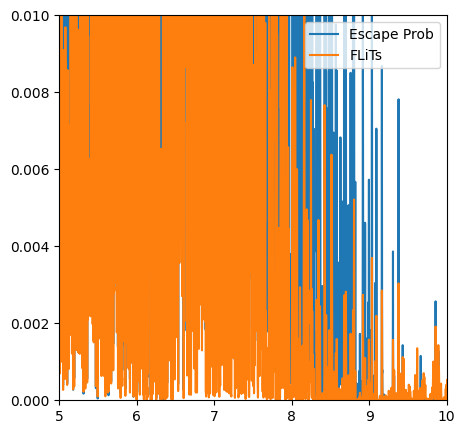

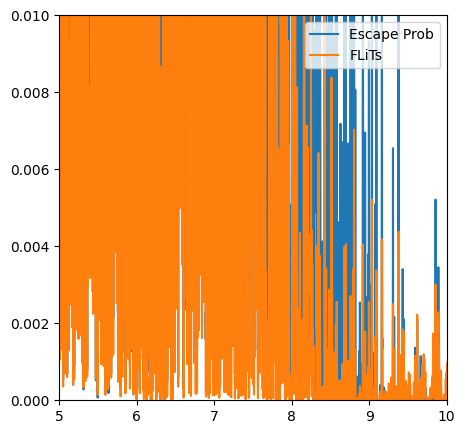

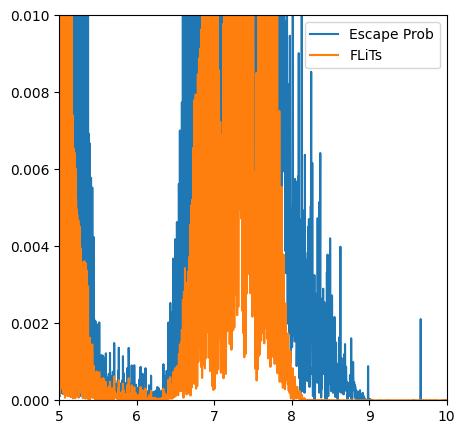

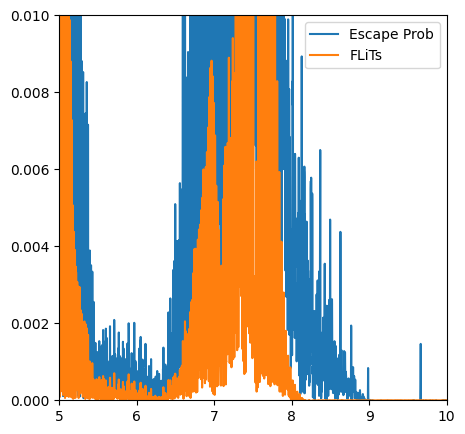

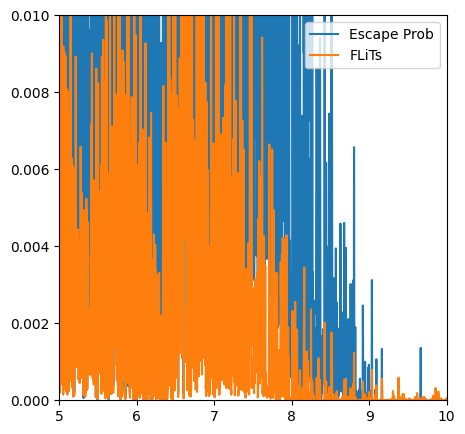

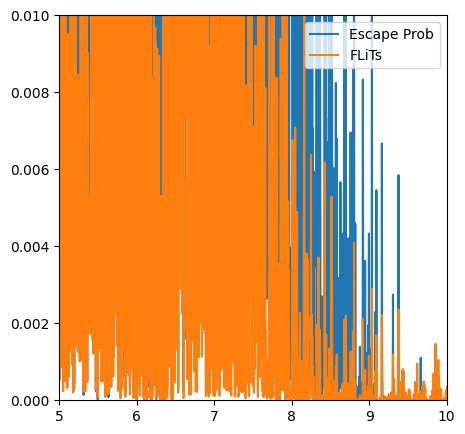

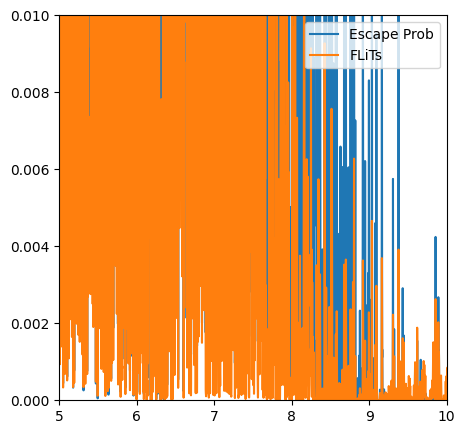

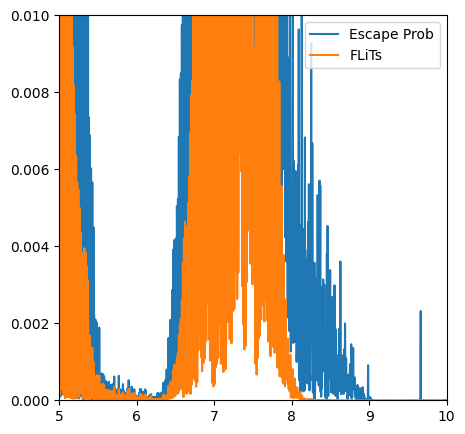

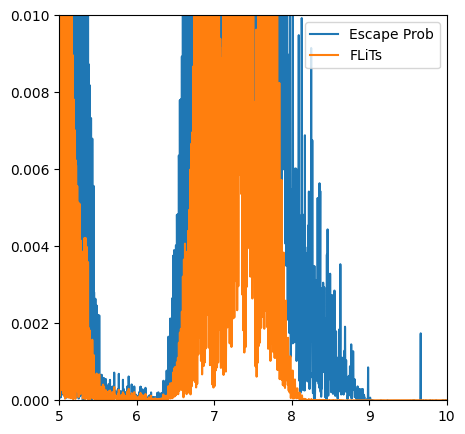

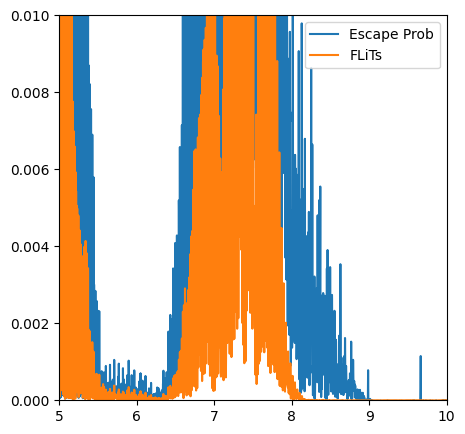

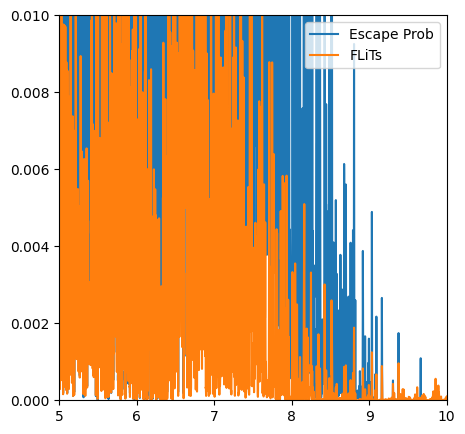

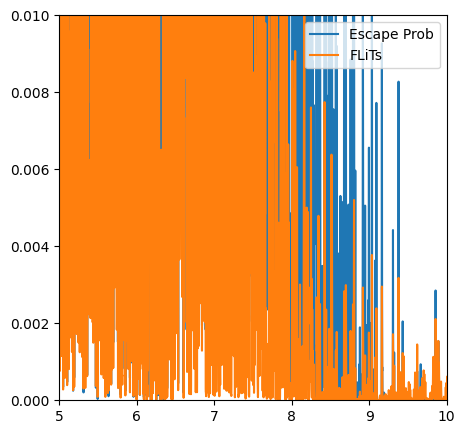

In [12]:
plt.close('all')
species = ['C2H2_H', 'CH4_H', 'CO', 'CO2_H', 'HCN_H', 'NH3_H', 'NO_H', 'OH', 'S', 'o-H2', 'o-H2O', 'p-H2', 'p-H2O',
           'Ion']
for index, row in df.iterrows():
    total_spectrum = None
    fig = plt.figure(figsize=(5, 5))
    for specie in species:
        if total_spectrum is None:
            total_spectrum = row[specie]
        else:
            total_spectrum += row[specie]
    plt.plot(row['Prodimo Wavelength'], total_spectrum, label='Escape Prob')
    plt.plot(row['FLiTs Wavelength'], row['FLiTs Flux'], label='FLiTs')
    plt.xlim(5, 10)
    plt.ylim(0, 0.01)
    plt.legend()
    plt.plot()